## Set up the Environment

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# Supervised Classification Methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Validation
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Get Data

We get this dataset from a large Engineering, Procurement, and Construction (EPC) firm that collects data for individual items being shipped through its supply chain network. This dataset contains more than 93,000 records and 137 columns related to various characteristics of shipments, origin, destination, and 10 milestones that the supplier has defined to track a shipment from production to customer.

In [2]:
df = pd.read_excel('Supply Chain Deliveries.xlsx')
df.head()

,Document,REV,DESCRIPTION,SUPPLIER_LOCATION,SUPPLIER_POSTAL_CODE,SUPPLIER_COUNTRY,DESC_REV_FRGT_TERMS,LINE_NUMBER,SUB_LINE_NUMBER,SHIP_GROUP,...,LOG2_STATUS_DATE,KEY_MILESTONE_DESCR_INMY,INMY_STATUS_DATE,KEY_MILESTONE_DESCR_OUTMY,OUTMY_STATUS_DATE,CURRENT_MILESTONE,CURRENT_MILESTONE_STATUS_DATE,BOM_UOM_FK,QTY_RECEIVED,QTY_ORDERED
0,D1357,7,ELECTRICAL BULK MATERIAL,HOUSTON,77040,US,NaN,135,0,9-6000-RR/CO 4-3,...,NaT,Inside the Marshalling yard,2011-12-06,Out of Marshalling Yard,2011-12-16,Shipgroup Closed,NaT,M,350,350
1,D615,0,PIPING VALVES- CARBON AND STAINLESS STEEL,HOUSTON,77013,US,NaN,1,0,PRO 14404 / 00184825 : 5-0001-B2-009/SRN HOU-0...,...,NaT,Inside the Marshalling yard,2009-07-27,Out of Marshalling Yard,NaT,Shipgroup Closed,NaT,EA,2,2
2,D2454,0,MISCELLANEOUS PVC MATERIALS,GYEONGNAM,656-906,KP,NaN,12,0,* GLORIA 29JUL09 : 9-CM5038-PL-A/SRN KOR-01/FLD,...,NaT,Inside the Marshalling yard,2009-07-24,Out of Marshalling Yard,2009-07-29,Shipgroup Closed,NaT,M,72,72
3,D2454,0,MISCELLANEOUS PVC MATERIALS,GYEONGNAM,656-906,KP,NaN,11,0,* GLORIA 29JUL09 : 9-CM5038-PL-A/SRN KOR-01/FLD,...,NaT,Inside the Marshalling yard,2009-07-24,Out of Marshalling Yard,2009-07-29,Shipgroup Closed,NaT,M,36,36
4,D1357,7,ELECTRICAL BULK MATERIAL,HOUSTON,77040,US,NaN,134,0,9-6000-RR/CO 4-3,...,NaT,Inside the Marshalling yard,2011-12-06,Out of Marshalling Yard,2011-12-16,Shipgroup Closed,NaT,M,100,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93379 entries, 0 to 93378
Columns: 137 entries, Document to QTY_ORDERED
dtypes: datetime64[ns](59), float64(29), int64(8), object(41)
memory usage: 97.6+ MB


In [4]:
# How many Null Data?
pd.set_option('display.max_rows', None)
df.isnull().sum()

Document                             0
REV                                  0
DESCRIPTION                          0
SUPPLIER_LOCATION                  116
SUPPLIER_POSTAL_CODE              1724
SUPPLIER_COUNTRY                   116
DESC_REV_FRGT_TERMS              92263
LINE_NUMBER                          0
SUB_LINE_NUMBER                      0
SHIP_GROUP                           0
DESTINATION                          0
QTY_TRACKED                          0
ITEM_PRIME_ID                        0
PO_PRIME_ID                          0
MATERIAL_TYPE                        0
ITEM_CODE                            0
BULK_SIZE                            0
ABBREV_DESCR                         0
PO_CREATED                           0
PO_LAST_UPDATED                      0
PO_ISSUED                          608
LINE_SOP_DATE                        0
LINE_RAS_DATE                        0
SUPPLIER_LAST_CONTACT            58506
SUPPLIER_NEXT_CONTACT            58506
KEY_MILESTONE_DESCR_SCP  

## Claening up

To clean up the dataset, we first dropped unnecessary columns (features) including noninformative features (e.g., the description columns), the columns containing the same value for all the records (e.g., SHIP_GROUP_TYPE which has the same value for all the records), and duplicated features (e.g., the columns containing the same value for every record such as the columns of REV and IN_DOC_REV_PK). Also, we dropped the columns with too many null values.

In [5]:
# dropp either the unncessary Columns or the Columns with too many Null values 
df = df.drop(['Document', 'DESCRIPTION', 'SUPPLIER_POSTAL_CODE', 'DESC_REV_FRGT_TERMS',
              'SUB_LINE_NUMBER', 'QTY_TRACKED', 'ITEM_CODE', 'BULK_SIZE', 'ABBREV_DESCR', 'PO_CREATED', 'PO_LAST_UPDATED', 
              'PO_ISSUED', 'SUPPLIER_LAST_CONTACT', 'SUPPLIER_NEXT_CONTACT', 'KEY_MILESTONE_DESCR_SCP', 
              'KEY_MILESTONE_DESCR_POA', 'POA_DATE', 'KEY_MILESTONE_DESCR_ETA', 'KEY_MILESTONE_DESCR_MRR', 
              'MILESTONE_1_NAME', 'MILESTONE_1_PROJECTED', 'MILESTONE_1_DEPENDENT', 'MILESTONE_1_DEP_ACTUALIZED', 
              'MILESTONE_1_SCHEDULE_WEIGHT', 'MILESTONE_2_NAME', 'MILESTONE_2_SCHEDULE_WEIGHT', 'MILESTONE_2_DEPENDENT',
              'MILESTONE_2_DEP_ACTUALIZED', 'MILESTONE_3_DEPENDENT', 'MILESTONE_3_DEP_ACTUALIZED', 
              'MILESTONE_3_NAME', 'MILESTONE_3_SCHEDULE_WEIGHT', 'MILESTONE_4_NAME', 'MILESTONE_4_SCHEDULE_WEIGHT',
              'MILESTONE_4_DEPENDENT', 'MILESTONE_4_DEP_ACTUALIZED', 'MILESTONE_5_NAME', 'MILESTONE_5_SCHEDULE', 
              'MILESTONE_5_ACTUALIZED', 'MILESTONE_5_PROJECTED', 'MILESTONE_5_FORECASTED', 'MILESTONE_5_DEPENDENT',
              'MILESTONE_5_DEP_ACTUALIZED', 'MILESTONE_5_SCHEDULE_WEIGHT', 'MILESTONE_6_NAME', 'MILESTONE_6_SCHEDULE_WEIGHT',
              'MILESTONE_6_PROJECTED', 'MILESTONE_6_DEPENDENT', 'MILESTONE_7_NAME', 'MILESTONE_7_SCHEDULE', 
              'MILESTONE_7_ACTUALIZED', 'MILESTONE_7_PROJECTED', 'MILESTONE_7_FORECASTED', 'MILESTONE_7_DEPENDENT',
              'MILESTONE_7_DEP_ACTUALIZED', 'MILESTONE_7_SCHEDULE_WEIGHT', 'MILESTONE_8_NAME', 'MILESTONE_8_SCHEDULE_WEIGHT',
              'MILESTONE_8_PROJECTED', 'MILESTONE_8_DEPENDENT', 'MILESTONE_9_NAME', 'MILESTONE_9_SCHEDULE_WEIGHT', 
              'MILESTONE_10_NAME', 'MILESTONE_10_DEPENDENT', 'MILESTONE_10_DEP_ACTUALIZED', 'MILESTONE_10_SCHEDULE_WEIGHT', 
              'SHIP_GROUP_STATUS_DESCR', 'SHIP_GROUP_TYEP_DESCR', 'KEY_MILESTONE_DESCR_LOG0', 'LOG0_STATUS_DATE', 
              'KEY_MILESTONE_DESCR_LOG1', 'LOG1_STATUS_DATE', 'KEY_MILESTONE_DESCR_LOG2', 'LOG2_STATUS_DATE', 
              'KEY_MILESTONE_DESCR_INMY', 'KEY_MILESTONE_DESCR_OUTMY', 'BOM_UOM_FK'], axis= 1)

In [6]:
pd.set_option('display.max_columns', None)
df.head(5)

,REV,SUPPLIER_LOCATION,SUPPLIER_COUNTRY,LINE_NUMBER,SHIP_GROUP,DESTINATION,ITEM_PRIME_ID,PO_PRIME_ID,MATERIAL_TYPE,LINE_SOP_DATE,LINE_RAS_DATE,SCP_DATE,ETA_DATE,MRR_DATE,MILESTONE_1_SCHEDULE,MILESTONE_1_ACTUALIZED,MILESTONE_1_FORECASTED,MILESTONE_2_SCHEDULE,MILESTONE_2_ACTUALIZED,MILESTONE_2_PROJECTED,MILESTONE_2_FORECASTED,MILESTONE_3_SCHEDULE,MILESTONE_3_ACTUALIZED,MILESTONE_3_PROJECTED,MILESTONE_3_FORECASTED,MILESTONE_4_SCHEDULE,MILESTONE_4_ACTUALIZED,MILESTONE_4_PROJECTED,MILESTONE_4_FORECASTED,MILESTONE_6_SCHEDULE,MILESTONE_6_ACTUALIZED,MILESTONE_6_FORECASTED,MILESTONE_6_DEP_ACTUALIZED,MILESTONE_8_SCHEDULE,MILESTONE_8_ACTUALIZED,MILESTONE_8_FORECASTED,MILESTONE_8_DEP_ACTUALIZED,MILESTONE_9_SCHEDULE,MILESTONE_9_ACTUALIZED,MILESTONE_9_PROJECTED,MILESTONE_9_FORECASTED,MILESTONE_9_DEPENDENT,MILESTONE_9_DEP_ACTUALIZED,MILESTONE_10_SCHEDULE,MILESTONE_10_ACTUALIZED,MILESTONE_10_PROJECTED,MILESTONE_10_FORECASTED,SHIP_POINT,SHIP_POINT_COUNTRY,SHIP_GROUP_STATUS,SHIP_GROUP_TYPE,MULTI_PROJECT_ID,IN_DOC_REV_PK,RECEIVING_ONLY_PO,INMY_STATUS_DATE,OUTMY_STATUS_DATE,CURRENT_MILESTONE,CURRENT_MILESTONE_STATUS_DATE,QTY_RECEIVED,QTY_ORDERED
0,7,HOUSTON,US,135,9-6000-RR/CO 4-3,FLD,6,9,B,2011-11-08,2011-10-20,2011-12-06,2012-01-17,2012-01-17,2011-12-01,2011-11-01,NaT,2011-12-01,2011-12-05,NaT,NaT,2011-12-02,2011-12-06,NaT,NaT,2011-12-06,2011-12-06,NaT,NaT,NaT,NaT,NaT,NaT,2011-12-15,2011-12-16,NaT,NaT,2012-01-02,2012-01-17,NaT,NaT,NaT,NaT,2012-01-06,2012-01-17,NaT,NaT,SEOUL,KR,C,E,1,7,N,2011-12-06,2011-12-16,Shipgroup Closed,NaT,350,350
1,0,HOUSTON,US,1,PRO 14404 / 00184825 : 5-0001-B2-009/SRN HOU-0...,PSP,5,5,B,2009-05-29,2009-06-01,NaT,NaT,2009-08-24,2009-04-14,2009-04-14,NaT,2009-04-14,2009-06-25,NaT,NaT,NaT,NaT,NaT,NaT,2009-04-19,2009-07-27,NaT,NaT,NaT,NaT,NaT,NaT,2009-05-03,2009-07-27,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2009-05-24,2009-08-24,NaT,NaT,BUSAN,KR,C,E,1,0,N,2009-07-27,NaT,Shipgroup Closed,NaT,2,2
2,0,GYEONGNAM,KP,12,* GLORIA 29JUL09 : 9-CM5038-PL-A/SRN KOR-01/FLD,FLD,9,9,B,2009-06-10,2009-04-24,2009-06-20,2009-09-13,2009-09-13,2009-06-05,2009-06-05,NaT,2009-06-05,2009-06-20,NaT,NaT,2009-06-06,2009-06-20,NaT,NaT,2009-06-10,2009-07-24,NaT,NaT,NaT,NaT,NaT,NaT,2009-06-19,NaT,NaT,2009-08-02,2009-07-07,NaT,NaT,NaT,NaT,2009-09-13,2009-07-11,2009-09-13,NaT,NaT,KOREA,KP,C,E,1,0,N,2009-07-24,2009-07-29,Shipgroup Closed,NaT,72,72
3,0,GYEONGNAM,KP,11,* GLORIA 29JUL09 : 9-CM5038-PL-A/SRN KOR-01/FLD,FLD,9,9,B,2009-06-10,2009-04-24,2009-06-20,2009-09-13,2009-09-13,2009-06-05,2009-06-05,NaT,2009-06-05,2009-06-20,NaT,NaT,2009-06-06,2009-06-20,NaT,NaT,2009-06-10,2009-07-24,NaT,NaT,NaT,NaT,NaT,NaT,2009-06-19,NaT,NaT,2009-08-02,2009-07-07,NaT,NaT,NaT,NaT,2009-09-13,2009-07-11,2009-09-13,NaT,NaT,KOREA,KP,C,E,1,0,N,2009-07-24,2009-07-29,Shipgroup Closed,NaT,36,36
4,7,HOUSTON,US,134,9-6000-RR/CO 4-3,FLD,6,9,B,2011-11-08,2011-10-20,2011-12-06,2012-01-17,2012-01-17,2011-12-01,2011-11-01,NaT,2011-12-01,2011-12-05,NaT,NaT,2011-12-02,2011-12-06,NaT,NaT,2011-12-06,2011-12-06,NaT,NaT,NaT,NaT,NaT,NaT,2011-12-15,2011-12-16,NaT,NaT,2012-01-02,2012-01-17,NaT,NaT,NaT,NaT,2012-01-06,2012-01-17,NaT,NaT,SEOUL,KR,C,E,1,7,N,2011-12-06,2011-12-16,Shipgroup Closed,NaT,100,100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93379 entries, 0 to 93378
Data columns (total 60 columns):
REV                              93379 non-null int64
SUPPLIER_LOCATION                93263 non-null object
SUPPLIER_COUNTRY                 93263 non-null object
LINE_NUMBER                      93379 non-null int64
SHIP_GROUP                       93379 non-null object
DESTINATION                      93379 non-null object
ITEM_PRIME_ID                    93379 non-null object
PO_PRIME_ID                      93379 non-null object
MATERIAL_TYPE                    93379 non-null object
LINE_SOP_DATE                    93379 non-null datetime64[ns]
LINE_RAS_DATE                    93379 non-null datetime64[ns]
SCP_DATE                         77059 non-null datetime64[ns]
ETA_DATE                         76768 non-null datetime64[ns]
MRR_DATE                         93379 non-null datetime64[ns]
MILESTONE_1_SCHEDULE             93379 non-null datetime64[ns]
MILESTONE_1_ACTUALIZ

In [8]:
# How many unique values the column REV has?
print(df['REV'].unique().shape[0])
print('\n')
group1 = df.groupby(['REV'])['REV'].count()
print(group1)

27


REV
0     43641
1      8021
2      7606
3      2788
4      3821
5      2004
6      2653
7       993
8      2397
9      1337
10      727
11      178
12      403
13     2769
14       83
15       37
16      105
17       90
18     7659
21     1421
23      248
24       98
26       80
27       51
31     2084
34      186
84     1899
Name: REV, dtype: int64


In [9]:
print((df['REV'] != df['IN_DOC_REV_PK']).sum())

0


As you see above, the Columns 'REV' and 'IN_DOC_REV_PK' have the same value for every record; so, we dropped a duplicated feature.

In [10]:
# Since the values of REV and IN_DOC_REV_PK are exactly the same, I dropped IN_DOC_REV_PK
df = df.drop(['IN_DOC_REV_PK'], axis= 1)

Some categorical features such as "SHIP_GROUP" contain many categories and are not so informative. For example, "SHIP_GROUP" has 8324 unique categories and because the dataset is not too big (we have only 93000 records), this categorical feature is not informative and dropped from the dataset.

In [11]:
# How many unique values?
print(df['SHIP_GROUP'].unique().shape[0])

8324


In [12]:
# Since there are too many unique values in SHIP_GROUP, it is not so useful and I dropped it
df = df.drop(['SHIP_GROUP'], axis= 1)

Some features (e.g. SUPPLIER_LOCATION, SHIP_POINT) have different values for the same object that need to be corrected. For example, the feature of SUPPLIER_LOCATION has the values of Houston and HOUSTON, though these are the same object). We replaced these values with the same value.

In [13]:
# How many unique values?
print(df['SUPPLIER_LOCATION'].unique().shape[0])
print(pd.Series(df['SUPPLIER_LOCATION'].unique()).sort_values())

99
35               ANCHORAGE
93                ANDERSON
95                 ARENDAL
23                 ATLANTA
38                  AUSTIN
46             BATON ROUGE
85                BEATRICE
24                BEAUMONT
75               BILLERICA
97             BIROBIDZHAN
69              BURLINGAME
12                 CALGARY
47                   CARMI
22              CHANHASSEN
88                 CHANUTE
82              CHELTENHAM
37                 CHICAGO
62              CINCINNATI
50                  CORONA
86                   COWES
39               DEER PARK
18                DINGWALL
26         EAST PETERSBURG
52                EDMONTON
32               ELM GROVE
63                  ELYRIA
68               FAIRBANKS
20             FEDERAL WAY
4               GEOJE CITY
7              GLENDENNING
25                GONZALES
65               GOSSELIES
34              GREENVILLE
1                GYEONGNAM
79                 HAMBURG
77                   HEMET
0                  HOUSTO

In [14]:
# Clean up SUPPLIER LOCATION column
df["SUPPLIER_LOCATION"].replace({"Houston": "HOUSTON", "YUZHNO-SAKHALINSK": "YUZHNO SAKHALINSK"}, inplace=True)
print(df['SUPPLIER_LOCATION'].unique().shape[0])
print(pd.Series(df['SUPPLIER_LOCATION'].unique()).sort_values())

97
34               ANCHORAGE
91                ANDERSON
93                 ARENDAL
22                 ATLANTA
37                  AUSTIN
45             BATON ROUGE
84                BEATRICE
23                BEAUMONT
74               BILLERICA
95             BIROBIDZHAN
68              BURLINGAME
11                 CALGARY
46                   CARMI
21              CHANHASSEN
87                 CHANUTE
81              CHELTENHAM
36                 CHICAGO
61              CINCINNATI
49                  CORONA
85                   COWES
38               DEER PARK
17                DINGWALL
25         EAST PETERSBURG
51                EDMONTON
31               ELM GROVE
62                  ELYRIA
67               FAIRBANKS
19             FEDERAL WAY
4               GEOJE CITY
6              GLENDENNING
24                GONZALES
64               GOSSELIES
33              GREENVILLE
1                GYEONGNAM
78                 HAMBURG
76                   HEMET
0                  HOUSTO

In [15]:
# How many unique values?
print(df['SUPPLIER_COUNTRY'].unique().shape[0])
print(df['SUPPLIER_COUNTRY'].unique())

13
['US' 'KP' 'RU' 'KR' 'AU' 'CA' 'GB' 'NL' nan 'BE' 'DE' 'NO' 'IT']


In [16]:
# How many unique values?
print(df['DESTINATION'].unique().shape[0])
print(df['DESTINATION'].unique())

16
['FLD' 'PSP' 'SH2' 'CHY' 'HOU' 'OKH' 'ITC' 'BJA' 'TLC' 'MY1' 'DII' 'SHP'
 'ABB' 'SH3' 'CTC' 'SWF']


In [17]:
# How many unique values?
print(df['ITEM_PRIME_ID'].unique().shape[0])
print(df['ITEM_PRIME_ID'].unique())

10
[6 5 9 7 'S' 3 'R' 4 2 8]


In [18]:
# How many unique values?
print(df['PO_PRIME_ID'].unique().shape[0])
print(df['PO_PRIME_ID'].unique())

10
[9 5 'S' 3 'R' 6 4 7 2 8]


In [19]:
# How many unique values?
print(df['MATERIAL_TYPE'].unique().shape[0])
print(df['MATERIAL_TYPE'].unique())

7
['B' 'T' 'K' 'I' 'M' 'N' 'S']


In [20]:
# How many unique values?
print(df['SHIP_POINT'].unique().shape[0])
print(pd.Series(df['SHIP_POINT'].unique()).sort_values())

296
251                            ABERDEEN
183                              ANTRIM
173                             ANTWERP
279                             ARENDAL
12                             AUCKLAND
62                               AUSTIN
45                    AZUSA, CALIFORNIA
217                          Alexandria
149                         BAKERSFIELD
158                           BARCELONA
85                          BATON ROUGE
194                            BEATRICE
39                             BEAUMONT
221                           BEAVERTON
70                              BEDFORD
257                     BEDFORD HEIGHTS
180                         BEDFORSHIRE
25                              BEIJING
165                             BELARUS
246                             BELGUIM
259                         BENSENVILLE
280                             BERGAMO
127                           BILLERCIA
223                           BILLERICA
94                           BIRMING

In [21]:
# Clean up SHIP_POINT column
df["SHIP_POINT"].replace({"BILLERCIA": "BILLERICA", "CHANHASSIN": "CHANHASSEN", 
                          "HOUSTON, TX": "HOUSTON", "HOUSTON, TX 77043-3892": "HOUSTON",
                          "HOUSTON, TX.": "HOUSTON", "HOUSTON,TX": "HOUSTON",
                          "MANCHESTER/ GB": "MANCHESTER", "SUGARLAND": "SUGAR LAND",
                          "TULSA, OK": "TULSA", "YUZHNO SAKHALINS": "YUZHNO SAKHALINSK",
                          "YUZHNO-SAHALINSK": "YUZHNO SAKHALINSK", "YUZHNO-SAKHAKLINSK": "YUZHNO SAKHALINSK",
                          "YUZHNO-SAKHALINSK": "YUZHNO SAKHALINSK"}, inplace=True) 

print(df['SHIP_POINT'].unique().shape[0])
print(pd.Series(df['SHIP_POINT'].unique()).sort_values())

283
238                            ABERDEEN
172                              ANTRIM
162                             ANTWERP
266                             ARENDAL
11                             AUCKLAND
55                               AUSTIN
38                    AZUSA, CALIFORNIA
206                          Alexandria
139                         BAKERSFIELD
148                           BARCELONA
75                          BATON ROUGE
183                            BEATRICE
32                             BEAUMONT
209                           BEAVERTON
62                              BEDFORD
244                     BEDFORD HEIGHTS
169                         BEDFORSHIRE
21                              BEIJING
154                             BELARUS
233                             BELGUIM
246                         BENSENVILLE
267                             BERGAMO
117                           BILLERICA
84                           BIRMINGHAM
111                         BLAIRSVI

In [22]:
# How many unique values?
print(df['SHIP_POINT_COUNTRY'].unique().shape[0])
print('\n')
group1 = df.groupby(['SHIP_POINT_COUNTRY'])['SHIP_POINT_COUNTRY'].count()
print(group1)

30


SHIP_POINT_COUNTRY
         18
AE       28
AU      758
BE      589
CA      928
CH      118
CN       24
CZ       18
DE      307
DK       74
EU      511
FI       69
FR      172
GB      195
IE       33
IN        1
IT      855
KP      708
KR      299
MX       37
NL       94
NO       66
NZ      305
RU    11457
SE       22
SG        4
SP       75
TR      238
UK     2026
US    73350
Name: SHIP_POINT_COUNTRY, dtype: int64


In [23]:
# Clean up SUPPLIER LOCATION column

df.loc[df.SHIP_POINT_COUNTRY == '  ', 'SHIP_POINT_COUNTRY'] = df.loc[df.SHIP_POINT_COUNTRY == '  ' , 'SHIP_POINT']

group1 = df.groupby(['SHIP_POINT_COUNTRY'])['SHIP_POINT_COUNTRY'].count()
print(group1)

SHIP_POINT_COUNTRY
AE             28
AU            758
BE            589
BELARUS         9
CA            928
CH            118
CN             24
CZ             18
DE            307
DK             74
EU            511
FI             69
FR            172
GB            195
IE             33
IN              1
IT            855
KP            708
KR            299
MALAYSIA        9
MX             37
NL             94
NO             66
NZ            305
RU          11457
SE             22
SG              4
SP             75
TR            238
UK           2026
US          73350
Name: SHIP_POINT_COUNTRY, dtype: int64


In [24]:
# How many unique values?
print(df['SHIP_GROUP_STATUS'].unique().shape[0])
print('\n')
group1 = df.groupby(['SHIP_GROUP_STATUS'])['SHIP_GROUP_STATUS'].count()
print(group1)

2


SHIP_GROUP_STATUS
C    88934
O     4445
Name: SHIP_GROUP_STATUS, dtype: int64


In [25]:
# How many unique values?
print(df['SHIP_GROUP_TYPE'].unique().shape[0])
print('\n')
group1 = df.groupby(['SHIP_GROUP_TYPE'])['SHIP_GROUP_TYPE'].count()
print(group1)

1


SHIP_GROUP_TYPE
E    93379
Name: SHIP_GROUP_TYPE, dtype: int64


In [26]:
# There is just the same value in SHIP_GROUP_TYPE for all records; so I drpped it
df = df.drop(['SHIP_GROUP_TYPE'], axis= 1)

In [27]:
# How many unique values?
print(df['MULTI_PROJECT_ID'].unique().shape[0])
print('\n')
group1 = df.groupby(['MULTI_PROJECT_ID'])['MULTI_PROJECT_ID'].count()
print(group1)

1


MULTI_PROJECT_ID
1    93379
Name: MULTI_PROJECT_ID, dtype: int64


In [28]:
# There is just the same value in MULTI_PROJECT_ID for all records; so I drpped it
df = df.drop(['MULTI_PROJECT_ID'], axis= 1)

In [29]:
# How many unique values?
print(df['RECEIVING_ONLY_PO'].unique().shape[0])
print('\n')
group1 = df.groupby(['RECEIVING_ONLY_PO'])['RECEIVING_ONLY_PO'].count()
print(group1)

2


RECEIVING_ONLY_PO
N    50718
Y    42661
Name: RECEIVING_ONLY_PO, dtype: int64


In [30]:
# How many unique values?
print(df['CURRENT_MILESTONE'].unique().shape[0])
print('\n')
group1 = df.groupby(['CURRENT_MILESTONE'])['CURRENT_MILESTONE'].count()
print(group1)

7


CURRENT_MILESTONE
AT PACKER                       6
ETA SITE                       42
FCA SUPPLIER SHOP             409
IN TRANSIT - FROM YUZHNO        7
MRR                          3740
Shipgroup Closed            88934
Name: CURRENT_MILESTONE, dtype: int64


In [31]:
print((df['QTY_RECEIVED'] != df['QTY_ORDERED']).sum())

826


In [32]:
# Because QTY_ORDERED and QTY_RECEIVED in the most cases have the same values, I just keep QTY_ORDERED
df = df.drop(['QTY_RECEIVED'], axis= 1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93379 entries, 0 to 93378
Data columns (total 55 columns):
REV                              93379 non-null int64
SUPPLIER_LOCATION                93263 non-null object
SUPPLIER_COUNTRY                 93263 non-null object
LINE_NUMBER                      93379 non-null int64
DESTINATION                      93379 non-null object
ITEM_PRIME_ID                    93379 non-null object
PO_PRIME_ID                      93379 non-null object
MATERIAL_TYPE                    93379 non-null object
LINE_SOP_DATE                    93379 non-null datetime64[ns]
LINE_RAS_DATE                    93379 non-null datetime64[ns]
SCP_DATE                         77059 non-null datetime64[ns]
ETA_DATE                         76768 non-null datetime64[ns]
MRR_DATE                         93379 non-null datetime64[ns]
MILESTONE_1_SCHEDULE             93379 non-null datetime64[ns]
MILESTONE_1_ACTUALIZED           93368 non-null datetime64[ns]
MILESTONE_1_

#### Fill Null values: 
Some important features, specifically the Milestone columns, have some Null values that can be effectively filled out using the values of other features. Since the Milestone features are the important features in this study, we don't want to easily drop all the records with missing values beacaue we will miss a lot of records. Therefore, after the consultation with the data analyst at the Firm, we found out the features containing the same value for the Milestones and use these duplicated features to fill out the Null values of the Milestone features. However, beacuse the Milestones 5 and 7 include too many Null values, we dropped those from the dataset.

In [34]:
# Filling Null Values in MILESTONE_1_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_1_ACTUALIZED before cleaning up:', df['MILESTONE_1_ACTUALIZED'].isnull().sum())

df['MILESTONE_1_ACTUALIZED'] = np.where(df['MILESTONE_1_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_1_FORECASTED'], df['MILESTONE_1_ACTUALIZED'])

print('Number of Null Values in MILESTONE_1_ACTUALIZED after cleaning up:', df['MILESTONE_1_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_1_FORECASTED'], axis= 1)

Number of Null Values in MILESTONE_1_ACTUALIZED before cleaning up: 11
Number of Null Values in MILESTONE_1_ACTUALIZED after cleaning up: 0


In [35]:
# Filling Null Values in MILESTONE_2_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_2_ACTUALIZED before cleaning up:', df['MILESTONE_2_ACTUALIZED'].isnull().sum())

df['MILESTONE_2_ACTUALIZED'] = np.where(df['MILESTONE_2_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_2_PROJECTED'], df['MILESTONE_2_ACTUALIZED'])

df['MILESTONE_2_ACTUALIZED'] = np.where(df['MILESTONE_2_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_2_FORECASTED'], df['MILESTONE_2_ACTUALIZED'])

print('Number of Null Values in MILESTONE_2_ACTUALIZED after cleaning up:', df['MILESTONE_2_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_2_FORECASTED', 'MILESTONE_2_PROJECTED'], axis= 1)

Number of Null Values in MILESTONE_2_ACTUALIZED before cleaning up: 10801
Number of Null Values in MILESTONE_2_ACTUALIZED after cleaning up: 10600


In [36]:
# Filling Null Values in MILESTONE_3_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_3_ACTUALIZED before cleaning up:', df['MILESTONE_3_ACTUALIZED'].isnull().sum())

df['MILESTONE_3_ACTUALIZED'] = np.where(df['MILESTONE_3_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_3_PROJECTED'], df['MILESTONE_3_ACTUALIZED'])

df['MILESTONE_3_ACTUALIZED'] = np.where(df['MILESTONE_3_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_3_FORECASTED'], df['MILESTONE_3_ACTUALIZED'])

print('Number of Null Values in MILESTONE_3_ACTUALIZED after cleaning up:', df['MILESTONE_3_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_3_FORECASTED', 'MILESTONE_3_PROJECTED'], axis= 1)

Number of Null Values in MILESTONE_3_ACTUALIZED before cleaning up: 16994
Number of Null Values in MILESTONE_3_ACTUALIZED after cleaning up: 16320


In [37]:
# Filling Null Values in MILESTONE_4_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_4_ACTUALIZED before cleaning up:', df['MILESTONE_4_ACTUALIZED'].isnull().sum())

df['MILESTONE_4_ACTUALIZED'] = np.where(df['MILESTONE_4_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_4_PROJECTED'], df['MILESTONE_4_ACTUALIZED'])

df['MILESTONE_4_ACTUALIZED'] = np.where(df['MILESTONE_4_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_4_FORECASTED'], df['MILESTONE_4_ACTUALIZED'])

print('Number of Null Values in MILESTONE_4_ACTUALIZED after cleaning up:', df['MILESTONE_4_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_4_FORECASTED', 'MILESTONE_4_PROJECTED'], axis= 1)

Number of Null Values in MILESTONE_4_ACTUALIZED before cleaning up: 16435
Number of Null Values in MILESTONE_4_ACTUALIZED after cleaning up: 15750


In [38]:
# Filling Null Values in MILESTONE_6_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_6_ACTUALIZED before cleaning up:', df['MILESTONE_6_ACTUALIZED'].isnull().sum())

df['MILESTONE_6_ACTUALIZED'] = np.where(df['MILESTONE_6_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_6_DEP_ACTUALIZED'], df['MILESTONE_6_ACTUALIZED'])

df['MILESTONE_6_ACTUALIZED'] = np.where(df['MILESTONE_6_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_6_FORECASTED'], df['MILESTONE_6_ACTUALIZED'])

print('Number of Null Values in MILESTONE_6_ACTUALIZED after cleaning up:', df['MILESTONE_6_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_6_FORECASTED', 'MILESTONE_6_DEP_ACTUALIZED'], axis= 1)

Number of Null Values in MILESTONE_6_ACTUALIZED before cleaning up: 54147
Number of Null Values in MILESTONE_6_ACTUALIZED after cleaning up: 40440


In [39]:
# Filling Null Values in MILESTONE_8_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_8_ACTUALIZED before cleaning up:', df['MILESTONE_8_ACTUALIZED'].isnull().sum())

df['MILESTONE_8_ACTUALIZED'] = np.where(df['MILESTONE_8_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_8_DEP_ACTUALIZED'], df['MILESTONE_8_ACTUALIZED'])

df['MILESTONE_8_ACTUALIZED'] = np.where(df['MILESTONE_8_ACTUALIZED'].isnull(), 
                                        df['MILESTONE_8_FORECASTED'], df['MILESTONE_8_ACTUALIZED'])

print('Number of Null Values in MILESTONE_8_ACTUALIZED after cleaning up:', df['MILESTONE_8_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_8_FORECASTED', 'MILESTONE_8_DEP_ACTUALIZED'], axis= 1)

Number of Null Values in MILESTONE_8_ACTUALIZED before cleaning up: 44899
Number of Null Values in MILESTONE_8_ACTUALIZED after cleaning up: 26223


In [40]:
# Filling Null Values in MILESTONE_9_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_9_ACTUALIZED before cleaning up:', df['MILESTONE_9_ACTUALIZED'].isnull().sum())

df['MILESTONE_9_ACTUALIZED'] = np.where(df['MILESTONE_9_ACTUALIZED'].isnull(), 
                                        df['ETA_DATE'], df['MILESTONE_9_ACTUALIZED'])

# df['MILESTONE_9_ACTUALIZED'] = np.where(df['MILESTONE_9_ACTUALIZED'].isnull(), 
#                                         df['MILESTONE_9_DEP_ACTUALIZED'], df['MILESTONE_9_ACTUALIZED'])

# df['MILESTONE_9_ACTUALIZED'] = np.where(df['MILESTONE_9_ACTUALIZED'].isnull(), 
#                                         df['MILESTONE_9_DEPENDENT'], df['MILESTONE_9_ACTUALIZED'])

# df['MILESTONE_9_ACTUALIZED'] = np.where(df['MILESTONE_9_ACTUALIZED'].isnull(), 
#                                         df['MILESTONE_9_PROJECTED'], df['MILESTONE_9_ACTUALIZED'])

# df['MILESTONE_9_ACTUALIZED'] = np.where(df['MILESTONE_9_ACTUALIZED'].isnull(), 
#                                         df['MILESTONE_9_FORECASTED'], df['MILESTONE_9_ACTUALIZED'])

print('Number of Null Values in MILESTONE_9_ACTUALIZED after cleaning up:', df['MILESTONE_9_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_9_FORECASTED', 'MILESTONE_9_DEP_ACTUALIZED', 'ETA_DATE',
              'MILESTONE_9_DEPENDENT', 'MILESTONE_9_PROJECTED'], axis= 1)

Number of Null Values in MILESTONE_9_ACTUALIZED before cleaning up: 35779
Number of Null Values in MILESTONE_9_ACTUALIZED after cleaning up: 16611


In [41]:
# Filling Null Values in MILESTONE_10_ACTUALIZED with the possible values from other columns 

print('Number of Null Values in MILESTONE_10_ACTUALIZED before cleaning up:', df['MILESTONE_10_ACTUALIZED'].isnull().sum())

df['MILESTONE_10_ACTUALIZED'] = np.where(df['MILESTONE_10_ACTUALIZED'].isnull(), 
                                        df['MRR_DATE'], df['MILESTONE_10_ACTUALIZED'])

# df['MILESTONE_10_ACTUALIZED'] = np.where(df['MILESTONE_10_ACTUALIZED'].isnull() & df['CURRENT_MILESTONE'] == 'MRR',
#                                          df['CURRENT_MILESTONE_STATUS_DATE'], df['MILESTONE_10_ACTUALIZED'])

# df['MILESTONE_10_ACTUALIZED'] = np.where(df['MILESTONE_10_ACTUALIZED'].isnull(), 
#                                         df['MILESTONE_10_PROJECTED'], df['MILESTONE_10_ACTUALIZED'])

# df['MILESTONE_10_ACTUALIZED'] = np.where(df['MILESTONE_10_ACTUALIZED'].isnull(), 
#                                         df['MILESTONE_10_FORECASTED'], df['MILESTONE_10_ACTUALIZED'])

# print('Number of Null Values in MILESTONE_10_ACTUALIZED after cleaning up:', df['MILESTONE_10_ACTUALIZED'].isnull().sum())

df = df.drop(['MILESTONE_10_FORECASTED', 'MILESTONE_10_PROJECTED', 'MRR_DATE',
              'CURRENT_MILESTONE', 'CURRENT_MILESTONE_STATUS_DATE'], axis= 1)

Number of Null Values in MILESTONE_10_ACTUALIZED before cleaning up: 6467


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93379 entries, 0 to 93378
Data columns (total 34 columns):
REV                        93379 non-null int64
SUPPLIER_LOCATION          93263 non-null object
SUPPLIER_COUNTRY           93263 non-null object
LINE_NUMBER                93379 non-null int64
DESTINATION                93379 non-null object
ITEM_PRIME_ID              93379 non-null object
PO_PRIME_ID                93379 non-null object
MATERIAL_TYPE              93379 non-null object
LINE_SOP_DATE              93379 non-null datetime64[ns]
LINE_RAS_DATE              93379 non-null datetime64[ns]
SCP_DATE                   77059 non-null datetime64[ns]
MILESTONE_1_SCHEDULE       93379 non-null datetime64[ns]
MILESTONE_1_ACTUALIZED     93379 non-null datetime64[ns]
MILESTONE_2_SCHEDULE       82779 non-null datetime64[ns]
MILESTONE_2_ACTUALIZED     82779 non-null datetime64[ns]
MILESTONE_3_SCHEDULE       77059 non-null datetime64[ns]
MILESTONE_3_ACTUALIZED     77059 non-null dat

### Create new features

We created a binary feature for each milestone showing whether the milestone has been met or not. For example, "MILESTONE_1_meet" is 1 if it has been met (i.e., the "MILESTONE_1_ACTUALIZED" date is before than the "MILESTONE_1_SCHEDULE" date) and it is 0 if it has not been met. Also, we created a numerical feature for each milestone showing the number of days between the scheduled and actualized dates of meeting the milestone. For example, "MILESTONE_1_Diff" shows the difference (in days) between the "MILESTONE_1_ACTUALIZED" and "MILESTONE_1_SCHEDULED".The negative values of "MILESTONE_x_Diff" shows the number of days that the "Milestone x" has been met earlier and the positive values shows the number of delay days. Note that Milestone_10_meet is our target feature that we want to predict it using other milestones and other features in the dataset.
We also created some additional features for the differences between the scheduled milestone 10 and the scheduled date of other milestones under the assumption that if we have more time between the scheduled dates of other milestones and milestone 10, the probability of meeting milestone 10 might be increased. Finally, we created some features showing the number of days between the scheduled milestone 10 and other important dates (i.e. LINE_SOP_DATE, LINE_RAS_DATE, and SCP_DATE) under the assumption that these might be informative for the prediction of meeting milestone 10.

In [43]:
# Create new features
df['MILESTONE_1_Diff'] = (df['MILESTONE_1_ACTUALIZED'] - df['MILESTONE_1_SCHEDULE']).dt.days
df['MILESTONE_1_meet'] = np.select([df['MILESTONE_1_Diff'].isnull(), df['MILESTONE_1_Diff'] <= 0, df['MILESTONE_1_Diff'] > 0], 
                                    [np.nan, 1 , 0])

df['MILESTONE_2_Diff'] = (df['MILESTONE_2_ACTUALIZED'] - df['MILESTONE_2_SCHEDULE']).dt.days
df['MILESTONE_2_meet'] = np.select([df['MILESTONE_2_Diff'].isnull(), df['MILESTONE_2_Diff'] <= 0, df['MILESTONE_2_Diff'] > 0], 
                                    [np.nan, 1 , 0])

df['MILESTONE_3_Diff'] = (df['MILESTONE_3_ACTUALIZED'] - df['MILESTONE_3_SCHEDULE']).dt.days
df['MILESTONE_3_meet'] = np.select([df['MILESTONE_3_Diff'].isnull(), df['MILESTONE_3_Diff'] <= 0, df['MILESTONE_3_Diff'] > 0], 
                                    [np.nan, 1 , 0])

df['MILESTONE_4_Diff'] = (df['MILESTONE_4_ACTUALIZED'] - df['MILESTONE_4_SCHEDULE']).dt.days
df['MILESTONE_4_meet'] = np.select([df['MILESTONE_4_Diff'].isnull(), df['MILESTONE_4_Diff'] <= 0, df['MILESTONE_4_Diff'] > 0], 
                                    [np.nan, 1 , 0])

df['MILESTONE_6_Diff'] = (df['MILESTONE_6_ACTUALIZED'] - df['MILESTONE_6_SCHEDULE']).dt.days
df['MILESTONE_6_meet'] = np.select([df['MILESTONE_6_Diff'].isnull(), df['MILESTONE_6_Diff'] <= 0, df['MILESTONE_6_Diff'] > 0], 
                                    [np.nan, 1 , 0])

df['MILESTONE_8_Diff'] = (df['MILESTONE_8_ACTUALIZED'] - df['MILESTONE_8_SCHEDULE']).dt.days
df['MILESTONE_8_meet'] = np.select([df['MILESTONE_8_Diff'].isnull(), df['MILESTONE_8_Diff'] <= 0, df['MILESTONE_8_Diff'] > 0], 
                                    [np.nan, 1 , 0])

df['MILESTONE_9_Diff'] = (df['MILESTONE_9_ACTUALIZED'] - df['MILESTONE_9_SCHEDULE']).dt.days
df['MILESTONE_9_meet'] = np.select([df['MILESTONE_9_Diff'].isnull(), df['MILESTONE_9_Diff'] <= 0, df['MILESTONE_9_Diff'] > 0], 
                                    [np.nan, 1 , 0])

df['MILESTONE_10_Diff'] = (df['MILESTONE_10_ACTUALIZED'] - df['MILESTONE_10_SCHEDULE']).dt.days
df['MILESTONE_10_meet'] = np.select([df['MILESTONE_10_Diff'].isnull(), df['MILESTONE_10_Diff']<=0, df['MILESTONE_10_Diff']>0], 
                                    [np.nan, 1 , 0])

df['SCHEDULE_1_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['MILESTONE_1_SCHEDULE']).dt.days
df['SCHEDULE_2_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['MILESTONE_2_SCHEDULE']).dt.days
df['SCHEDULE_3_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['MILESTONE_3_SCHEDULE']).dt.days
df['SCHEDULE_4_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['MILESTONE_4_SCHEDULE']).dt.days
df['SCHEDULE_6_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['MILESTONE_6_SCHEDULE']).dt.days
df['SCHEDULE_8_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['MILESTONE_8_SCHEDULE']).dt.days
df['SCHEDULE_9_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['MILESTONE_9_SCHEDULE']).dt.days

df['SCHEDULE_SOP_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['LINE_SOP_DATE']).dt.days
df['SCHEDULE_RAS_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['LINE_RAS_DATE']).dt.days
df['SCHEDULE_SCP_10_Diff'] = (df['MILESTONE_10_SCHEDULE'] - df['SCP_DATE']).dt.days


df.head(5)

,REV,SUPPLIER_LOCATION,SUPPLIER_COUNTRY,LINE_NUMBER,DESTINATION,ITEM_PRIME_ID,PO_PRIME_ID,MATERIAL_TYPE,LINE_SOP_DATE,LINE_RAS_DATE,SCP_DATE,MILESTONE_1_SCHEDULE,MILESTONE_1_ACTUALIZED,MILESTONE_2_SCHEDULE,MILESTONE_2_ACTUALIZED,MILESTONE_3_SCHEDULE,MILESTONE_3_ACTUALIZED,MILESTONE_4_SCHEDULE,MILESTONE_4_ACTUALIZED,MILESTONE_6_SCHEDULE,MILESTONE_6_ACTUALIZED,MILESTONE_8_SCHEDULE,MILESTONE_8_ACTUALIZED,MILESTONE_9_SCHEDULE,MILESTONE_9_ACTUALIZED,MILESTONE_10_SCHEDULE,MILESTONE_10_ACTUALIZED,SHIP_POINT,SHIP_POINT_COUNTRY,SHIP_GROUP_STATUS,RECEIVING_ONLY_PO,INMY_STATUS_DATE,OUTMY_STATUS_DATE,QTY_ORDERED,MILESTONE_1_Diff,MILESTONE_1_meet,MILESTONE_2_Diff,MILESTONE_2_meet,MILESTONE_3_Diff,MILESTONE_3_meet,MILESTONE_4_Diff,MILESTONE_4_meet,MILESTONE_6_Diff,MILESTONE_6_meet,MILESTONE_8_Diff,MILESTONE_8_meet,MILESTONE_9_Diff,MILESTONE_9_meet,MILESTONE_10_Diff,MILESTONE_10_meet,SCHEDULE_1_10_Diff,SCHEDULE_2_10_Diff,SCHEDULE_3_10_Diff,SCHEDULE_4_10_Diff,SCHEDULE_6_10_Diff,SCHEDULE_8_10_Diff,SCHEDULE_9_10_Diff,SCHEDULE_SOP_10_Diff,SCHEDULE_RAS_10_Diff,SCHEDULE_SCP_10_Diff
0,7,HOUSTON,US,135,FLD,6,9,B,2011-11-08,2011-10-20,2011-12-06,2011-12-01,2011-11-01,2011-12-01,2011-12-05,2011-12-02,2011-12-06,2011-12-06,2011-12-06,NaT,NaT,2011-12-15,2011-12-16,2012-01-02,2012-01-17,2012-01-06,2012-01-17,SEOUL,KR,C,N,2011-12-06,2011-12-16,350,-30,1.0,4.0,0.0,4.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,15.0,0.0,11,0.0,36,36.0,35.0,31.0,NaN,22.0,4.0,59,78,31.0
1,0,HOUSTON,US,1,PSP,5,5,B,2009-05-29,2009-06-01,NaT,2009-04-14,2009-04-14,2009-04-14,2009-06-25,NaT,NaT,2009-04-19,2009-07-27,NaT,NaT,2009-05-03,2009-07-27,NaT,NaT,2009-05-24,2009-08-24,BUSAN,KR,C,N,2009-07-27,NaT,2,0,1.0,72.0,0.0,NaN,NaN,99.0,0.0,NaN,NaN,85.0,0.0,NaN,NaN,92,0.0,40,40.0,NaN,35.0,NaN,21.0,NaN,-5,-8,NaN
2,0,GYEONGNAM,KP,12,FLD,9,9,B,2009-06-10,2009-04-24,2009-06-20,2009-06-05,2009-06-05,2009-06-05,2009-06-20,2009-06-06,2009-06-20,2009-06-10,2009-07-24,NaT,NaT,2009-06-19,2009-08-02,2009-07-07,2009-09-13,2009-07-11,2009-09-13,KOREA,KP,C,N,2009-07-24,2009-07-29,72,0,1.0,15.0,0.0,14.0,0.0,44.0,0.0,NaN,NaN,44.0,0.0,68.0,0.0,64,0.0,36,36.0,35.0,31.0,NaN,22.0,4.0,31,78,21.0
3,0,GYEONGNAM,KP,11,FLD,9,9,B,2009-06-10,2009-04-24,2009-06-20,2009-06-05,2009-06-05,2009-06-05,2009-06-20,2009-06-06,2009-06-20,2009-06-10,2009-07-24,NaT,NaT,2009-06-19,2009-08-02,2009-07-07,2009-09-13,2009-07-11,2009-09-13,KOREA,KP,C,N,2009-07-24,2009-07-29,36,0,1.0,15.0,0.0,14.0,0.0,44.0,0.0,NaN,NaN,44.0,0.0,68.0,0.0,64,0.0,36,36.0,35.0,31.0,NaN,22.0,4.0,31,78,21.0
4,7,HOUSTON,US,134,FLD,6,9,B,2011-11-08,2011-10-20,2011-12-06,2011-12-01,2011-11-01,2011-12-01,2011-12-05,2011-12-02,2011-12-06,2011-12-06,2011-12-06,NaT,NaT,2011-12-15,2011-12-16,2012-01-02,2012-01-17,2012-01-06,2012-01-17,SEOUL,KR,C,N,2011-12-06,2011-12-16,100,-30,1.0,4.0,0.0,4.0,0.0,0.0,1.0,NaN,NaN,1.0,0.0,15.0,0.0,11,0.0,36,36.0,35.0,31.0,NaN,22.0,4.0,59,78,31.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93379 entries, 0 to 93378
Data columns (total 60 columns):
REV                        93379 non-null int64
SUPPLIER_LOCATION          93263 non-null object
SUPPLIER_COUNTRY           93263 non-null object
LINE_NUMBER                93379 non-null int64
DESTINATION                93379 non-null object
ITEM_PRIME_ID              93379 non-null object
PO_PRIME_ID                93379 non-null object
MATERIAL_TYPE              93379 non-null object
LINE_SOP_DATE              93379 non-null datetime64[ns]
LINE_RAS_DATE              93379 non-null datetime64[ns]
SCP_DATE                   77059 non-null datetime64[ns]
MILESTONE_1_SCHEDULE       93379 non-null datetime64[ns]
MILESTONE_1_ACTUALIZED     93379 non-null datetime64[ns]
MILESTONE_2_SCHEDULE       82779 non-null datetime64[ns]
MILESTONE_2_ACTUALIZED     82779 non-null datetime64[ns]
MILESTONE_3_SCHEDULE       77059 non-null datetime64[ns]
MILESTONE_3_ACTUALIZED     77059 non-null dat

In [45]:
df.describe()

# features = ['REV', 'SUPPLIER_LOCATION', 'LINE_NUMBER', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 
#             'MATERIAL_TYPE', 'SHIP_POINT', 'RECEIVING_ONLY_PO', 'QTY_ORDERED']

,REV,LINE_NUMBER,QTY_ORDERED,MILESTONE_1_Diff,MILESTONE_1_meet,MILESTONE_2_Diff,MILESTONE_2_meet,MILESTONE_3_Diff,MILESTONE_3_meet,MILESTONE_4_Diff,MILESTONE_4_meet,MILESTONE_6_Diff,MILESTONE_6_meet,MILESTONE_8_Diff,MILESTONE_8_meet,MILESTONE_9_Diff,MILESTONE_9_meet,MILESTONE_10_Diff,MILESTONE_10_meet,SCHEDULE_1_10_Diff,SCHEDULE_2_10_Diff,SCHEDULE_3_10_Diff,SCHEDULE_4_10_Diff,SCHEDULE_6_10_Diff,SCHEDULE_8_10_Diff,SCHEDULE_9_10_Diff,SCHEDULE_SOP_10_Diff,SCHEDULE_RAS_10_Diff,SCHEDULE_SCP_10_Diff
count,93379.000000,93379.000000,93379.000000,93379.000000,93379.000000,82779.000000,82779.000000,77059.000000,77059.000000,77629.000000,77629.000000,52939.000000,52939.000000,67156.000000,67156.000000,76768.000000,76768.000000,93379.000000,93379.000000,93379.000000,82779.000000,77059.000000,77630.000000,52941.000000,67159.000000,76768.000000,93379.000000,93379.000000,77059.000000
mean,6.164416,426.937770,171.066889,3.990126,0.985821,86.285616,0.455043,87.708483,0.388676,92.629778,0.273364,103.685204,0.357770,106.115284,0.312496,101.292205,0.283660,142.527238,0.252659,54.880755,60.149313,62.805110,59.352686,55.643981,22.003097,3.710804,-4.459536,-15.173915,-24.903386
std,13.386870,924.983932,5207.802569,90.595746,0.118228,136.594899,0.497978,167.444993,0.487453,161.251814,0.445689,151.209426,0.479349,151.041931,0.463514,167.180350,0.450777,232.269033,0.434539,30.123203,27.856729,24.793797,23.736255,3.777795,1.404193,0.716250,148.986247,167.741260,167.163248
min,0.000000,1.000000,0.000000,-773.000000,0.000000,-421.000000,0.000000,-6928.000000,0.000000,-365.000000,0.000000,-330.000000,0.000000,-334.000000,0.000000,-365.000000,0.000000,-348.000000,0.000000,10.000000,10.000000,13.000000,13.000000,23.000000,9.000000,1.000000,-6930.000000,-6930.000000,-6938.000000
25%,0.000000,13.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,-6.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,13.000000,41.000000,40.000000,36.000000,55.000000,22.000000,4.000000,-27.000000,-55.000000,-60.000000
50%,1.000000,69.000000,1.000000,0.000000,1.000000,13.000000,0.000000,21.000000,0.000000,25.000000,0.000000,41.000000,0.000000,51.000000,0.000000,40.000000,0.000000,54.000000,0.000000,79.000000,79.000000,78.000000,74.000000,55.000000,22.000000,4.000000,16.000000,20.000000,13.000000
75%,6.000000,351.000000,6.000000,0.000000,1.000000,122.000000,1.000000,117.000000,1.000000,129.000000,1.000000,166.000000,1.000000,161.000000,1.000000,156.000000,1.000000,174.000000,1.000000,79.000000,79.000000,78.000000,74.000000,55.000000,22.000000,4.000000,67.000000,79.000000,78.000000
max,84.000000,6310.000000,800000.000000,6941.000000,1.000000,1129.000000,1.000000,6951.000000,1.000000,6948.000000,1.000000,730.000000,1.000000,1123.000000,1.000000,6948.000000,1.000000,6948.000000,1.000000,134.000000,134.000000,129.000000,129.000000,110.000000,77.000000,4.000000,3664.000000,3293.000000,6941.000000


Milestone 10 is the target feature that we want to predict using other features. 

In [46]:
group1 = df.groupby(['MILESTONE_10_meet'])['MILESTONE_10_meet'].count()
print(group1)

MILESTONE_10_meet
0.0    69786
1.0    23593
Name: MILESTONE_10_meet, dtype: int64


### Visualize Data

Text(0.5, 1.0, 'Distribution by Meeting Milestone 10')

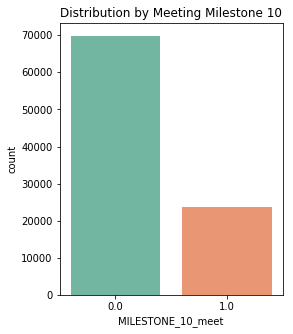

In [47]:
# Plot the Target Variable (Milestone 10)

plt.figure(figsize=(4,5))
p = sns.countplot(x="MILESTONE_10_meet", data=df, palette="Set2")
plt.title('Distribution by Meeting Milestone 10')

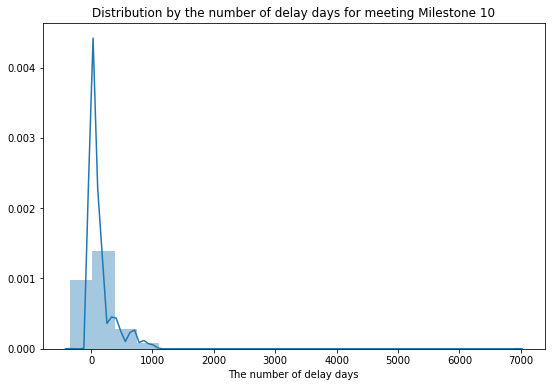

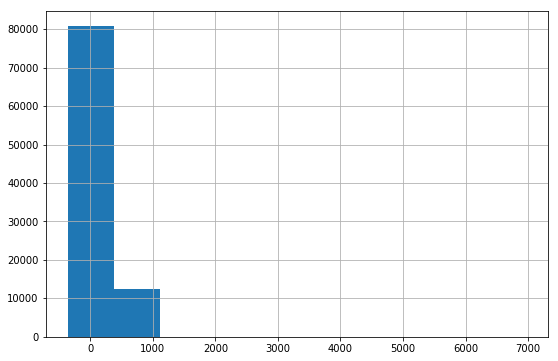

In [48]:
# Plot the Difference between Scheduled and Actualized Dates of Milestone 10
plt.figure(figsize=(9,6))
sns.distplot(df["MILESTONE_10_Diff"], bins=20)
plt.title("Distribution by the number of delay days for meeting Milestone 10")
plt.xlabel("The number of delay days")

plt.figure(figsize=(9,6))
df['MILESTONE_10_Diff'].hist()
plt.show()

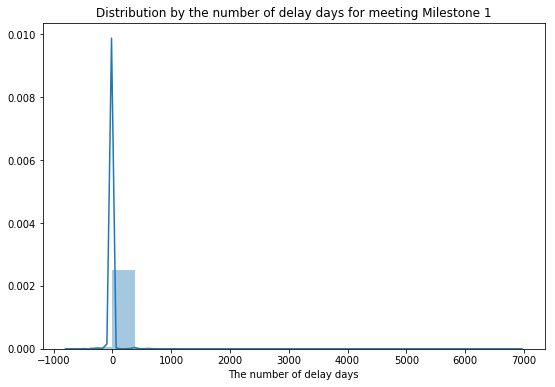

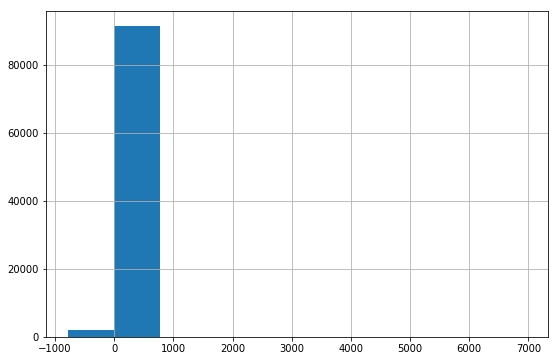

In [49]:
# Plot the Difference between Scheduled and Actualized Dates of Milestone 10
plt.figure(figsize=(9,6))
sns.distplot(df["MILESTONE_1_Diff"], bins=20)
plt.title("Distribution by the number of delay days for meeting Milestone 1")
plt.xlabel("The number of delay days")

plt.figure(figsize=(9,6))
df['MILESTONE_1_Diff'].hist()
plt.show()

Text(0.5, 1.0, 'Distribution by Material Type')

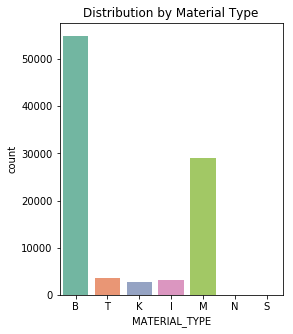

In [50]:
# Plot the MATERIAL_TYPE

plt.figure(figsize=(4,5))
p = sns.countplot(x="MATERIAL_TYPE", data=df, palette="Set2")
plt.title('Distribution by Material Type')

Text(0.5, 1.0, 'Distribution by Ship Point Country')

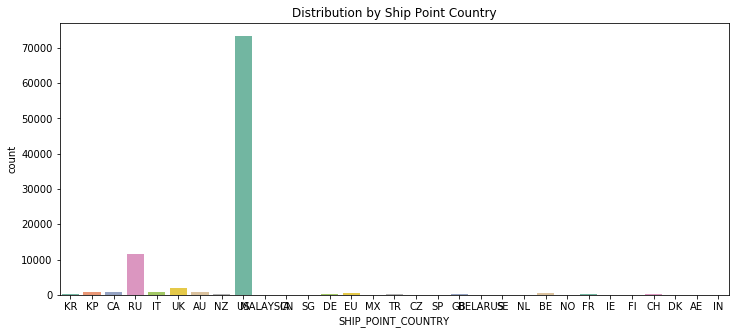

In [51]:
# Plot the SHIP_POINT_COUNTRY

plt.figure(figsize=(12,5))
p = sns.countplot(x="SHIP_POINT_COUNTRY", data=df, palette="Set2")
plt.title('Distribution by Ship Point Country')

Text(0.5, 1.0, 'Distribution by Receiving only Product')

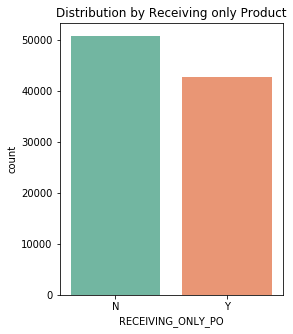

In [52]:
# Plot the SHIP_POINT_COUNTRY

plt.figure(figsize=(4,5))
p = sns.countplot(x="RECEIVING_ONLY_PO", data=df, palette="Set2")
plt.title('Distribution by Receiving only Product')

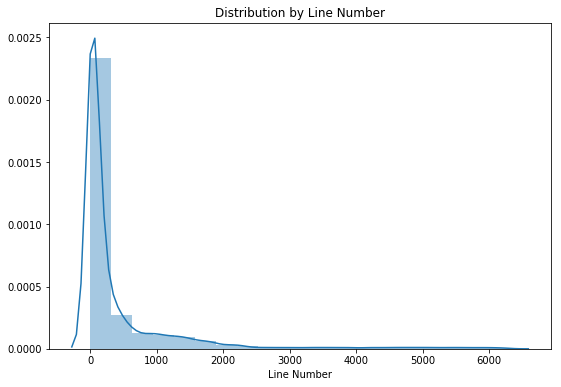

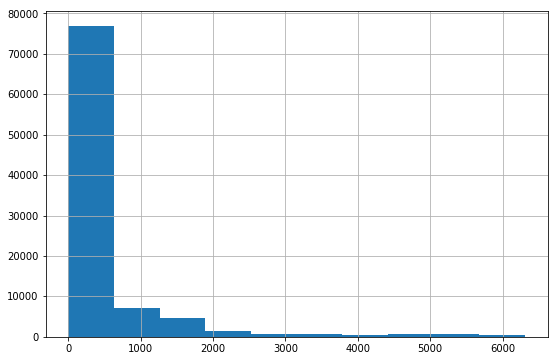

In [53]:
# Plot the Line Number
plt.figure(figsize=(9,6))
sns.distplot(df["LINE_NUMBER"], bins=20)
plt.title("Distribution by Line Number")
plt.xlabel("Line Number")

plt.figure(figsize=(9,6))
df['LINE_NUMBER'].hist()
plt.show()

Text(0.5, 1.0, 'Distribution by Meeting Milestone 9')

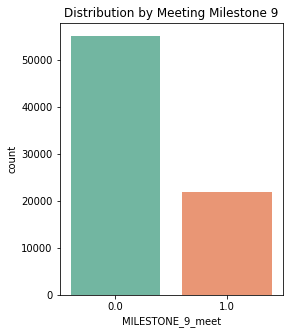

In [54]:
# Plot Milestone 9

plt.figure(figsize=(4,5))
p = sns.countplot(x="MILESTONE_9_meet", data=df, palette="Set2")
plt.title('Distribution by Meeting Milestone 9')

Text(0.5, 1.0, 'Distribution by Meeting Milestone 8')

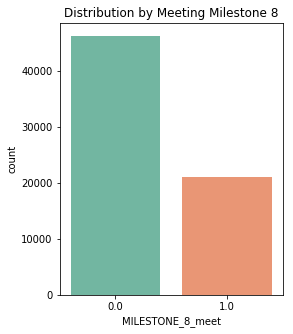

In [55]:
# Plot Milestone 8

plt.figure(figsize=(4,5))
p = sns.countplot(x="MILESTONE_8_meet", data=df, palette="Set2")
plt.title('Distribution by Meeting Milestone 8')

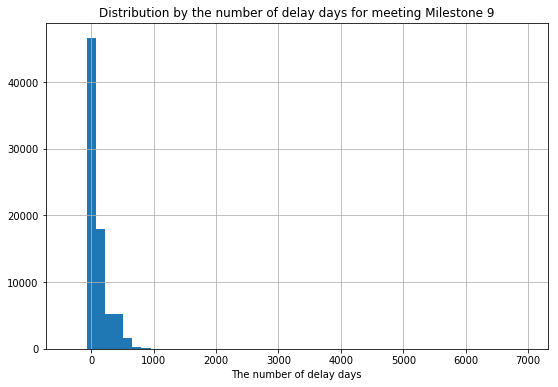

In [56]:
# Plot the Difference between Scheduled and Actualized Dates of Milestone 9

plt.figure(figsize=(9,6))
df['MILESTONE_9_Diff'].hist(bins=50)
plt.title("Distribution by the number of delay days for meeting Milestone 9")
plt.xlabel("The number of delay days")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162039B3358>,
      dtype=object)

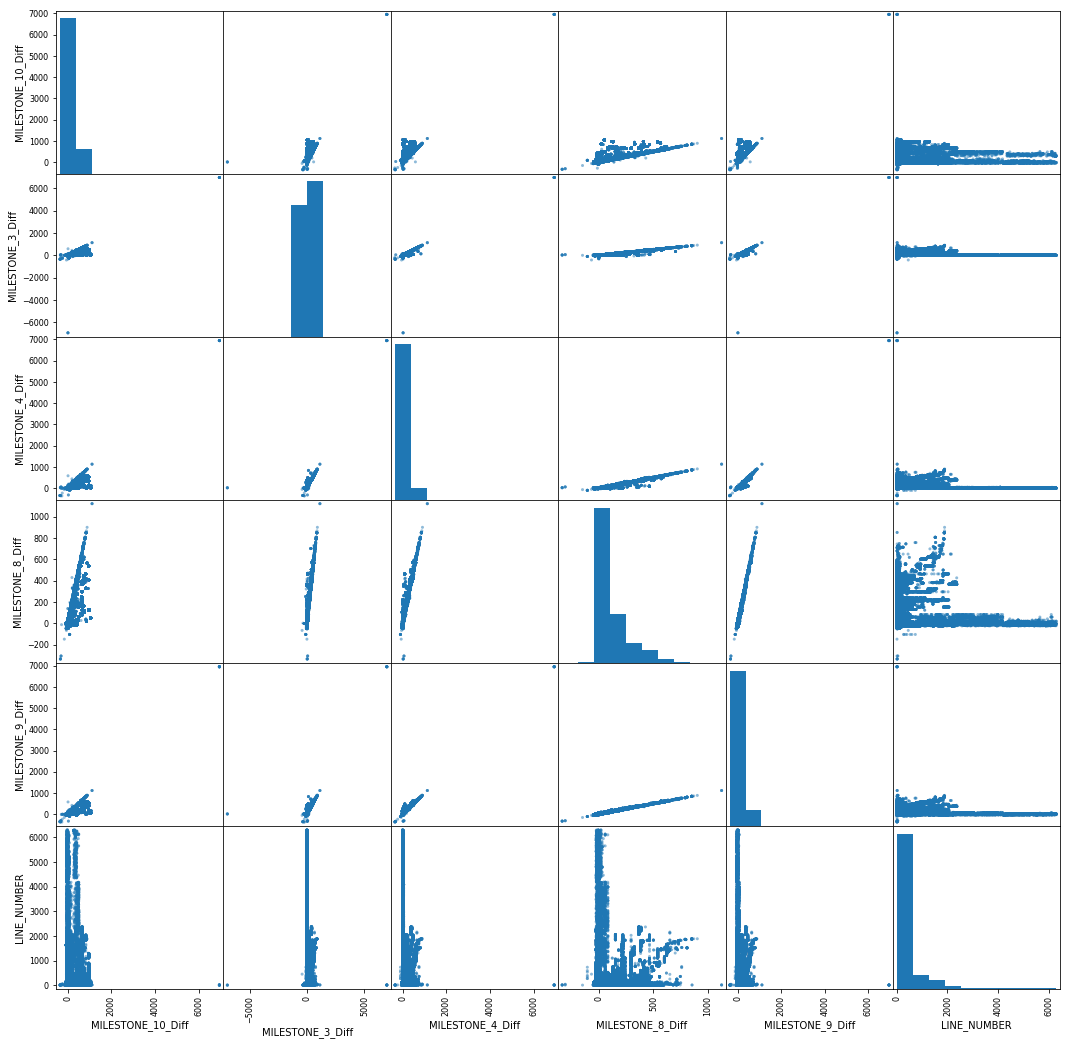

In [57]:
# Scatter Matrix
from pandas.plotting import scatter_matrix

attributes = ['MILESTONE_10_Diff', 'MILESTONE_3_Diff', 'MILESTONE_4_Diff',
              'MILESTONE_8_Diff', 'MILESTONE_9_Diff', 'LINE_NUMBER' ]
scatter_matrix(df[attributes], figsize=(18,18))

### Encoding Categorical Features & Scaling Numerical Features

It should be noted that according to the performance metrics, our final model is Random Forest. Random Forest require neither encoding categorical features nor scaling numerical features. However, we still do encoding and scaling processes because we will test other classification methods such as SVM, KNN, and Logistic Reression and these methods require encoded categorical data and scaled numerical data to produce better results. Also, to encode categorical data, we used label encoder method which is a simple encoder method; however, other encoders such as One Hot encoder might produce more reliable results and should be considered in  future works. 

In [58]:
features_cat = ['REV','SUPPLIER_LOCATION', 'SUPPLIER_COUNTRY', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 'MATERIAL_TYPE',
                'SHIP_POINT', 'SHIP_POINT_COUNTRY', 'SHIP_GROUP_STATUS', 'RECEIVING_ONLY_PO']

features_num = ['LINE_NUMBER', 'QTY_ORDERED', 'MILESTONE_1_Diff', 'MILESTONE_2_Diff', 'MILESTONE_3_Diff', 'MILESTONE_4_Diff',
                'MILESTONE_6_Diff', 'MILESTONE_8_Diff', 'MILESTONE_9_Diff', 'SCHEDULE_1_10_Diff', 'SCHEDULE_2_10_Diff',
                'SCHEDULE_3_10_Diff', 'SCHEDULE_4_10_Diff', 'SCHEDULE_6_10_Diff', 'SCHEDULE_8_10_Diff', 'SCHEDULE_9_10_Diff',
                'SCHEDULE_SOP_10_Diff', 'SCHEDULE_RAS_10_Diff', 'SCHEDULE_SCP_10_Diff']

# Feature Encoding
for feature in features_cat:
    le = preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))

#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for feature in features_num:
    df[feature] = scaler.fit_transform(df[[feature]])

C:\Users\fifi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fifi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\fifi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fifi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\fifi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by

## Modeling Scenarios:
#### For the prediction of meeting Milestone 10, we followed 3 different modeling scenarios:

Scenario 1: We are at the stage after Milestone 9 and know whether the Milestones 1 through 9 have been met or not.

Scenario 2: We are at the early stage before meeting any milestones. Therefore, in this scenario, we assumed that we do not have any information on whether Milestones 1 trough 9 will be met or not.

Scenario 3: We supposed that we do not have any information on meeting the Milestones 1 trough 9 and on other time-dependent features such as Line_SOP_date, Line_RAS_date, etc. In other words, in this scenario, we only used time-independent features such as ORIGIN, DESTINATION, SHIPMENT TYPE, SUPPLIER, etc. to predict meeting Milestone 10.

## Scenario 1: We are at the stage after Milestone 9

In Scenario 1, we developed 3 models, each model includes different features.

### Model 1: Using binary features for meeting the Milestones 1-9

In Model 1, in addition to the available features, we included the binary features showing whether the milestones 1-9 have been met or not.  We tuned Random Forest to determine the best values for the hyperparameters of max_depth, max_features, and min_samples_leaf. Also, we determined the importance of features and selected the most important ones using the importance of features obtained from Random Forest. Finally, we selected the most important features, trained the tuned Random Forest model, and obtained the performance metrics using test dataset.

[1.55682095e-02 2.78021375e-02 7.15954786e-04 1.76863469e-01
 8.74489230e-04 1.59926449e-02 4.02861215e-02 1.19463779e-02
 4.80764824e-02 1.91898400e-03 2.69645887e-03 2.46880798e-02
 1.71034204e-02 3.99834453e-07 4.31883260e-02 5.39053087e-02
 7.06440350e-02 1.22532092e-01 1.15879607e-01 2.09317402e-01]


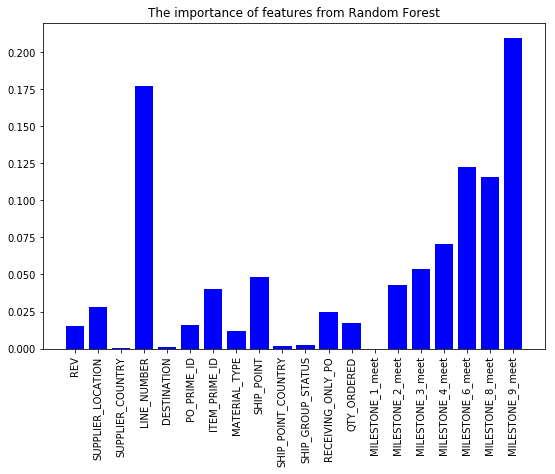

In [59]:
# Define a forest and determine the important of features
features = ['REV', 'SUPPLIER_LOCATION', 'SUPPLIER_COUNTRY', 'LINE_NUMBER', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 
            'MATERIAL_TYPE', 'SHIP_POINT', 'SHIP_POINT_COUNTRY', 'SHIP_GROUP_STATUS', 'RECEIVING_ONLY_PO',
            'QTY_ORDERED', 'MILESTONE_1_meet', 'MILESTONE_2_meet', 'MILESTONE_3_meet', 'MILESTONE_4_meet', 
            'MILESTONE_6_meet', 'MILESTONE_8_meet', 'MILESTONE_9_meet', 'MILESTONE_10_meet']

df1 = df[features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

features.remove('MILESTONE_10_meet')
forest = RandomForestClassifier(n_estimators=300, random_state=1000)
forest.fit(x,y)
importances = forest.feature_importances_
print(importances)

labels = []
for f in range(x.shape[1]):
    labels.append(features[f])      
    
# Plot the importance of features in the forest
plt.figure(figsize=(9,6))
plt.title("The importance of features from Random Forest")
plt.bar(features, importances, color="b")
plt.xticks(features, labels, rotation='vertical')
plt.show()

In [60]:
# Selecting Features
selected_features = ['SUPPLIER_LOCATION', 'LINE_NUMBER', 'ITEM_PRIME_ID', 'SHIP_POINT', 'RECEIVING_ONLY_PO',
                     'MILESTONE_2_meet', 'MILESTONE_3_meet', 'MILESTONE_4_meet', 'MILESTONE_6_meet', 'MILESTONE_8_meet', 
                     'MILESTONE_9_meet', 'MILESTONE_10_meet']

df1 = df[selected_features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

# define training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1000)
print('The training size:', x_train.shape[0])
print('The testing size:', x_test.shape[0])

The training size: 42193
The testing size: 10549


In [61]:
# Random Forest Hyperparameters Tuning

model = RandomForestClassifier(random_state = 1000)

param_grid = [{'max_depth': [7, 10, 15],
               'max_features': [3, 5, 7],
               'min_samples_leaf': [1, 2, 3]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Random Forest Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Random Forest Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 1}

All the hyperparameters for the best Random Forest Model are:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

The Cross Validated Accuracy for the best Random Forest Model is:
0.9139193705116962


Cross-Validated Accuracies:
[0.91090047 0.90805687 0.92109005 0.91090047 0.91587678 0.91609386
 0.90732401 0.92320455 0.91891892 0.91038407]

Mean Cross-Validated Accuracy: 0.9142750054122457

Training Accuracy: 0.9195601166070201

Testing Accuracy: 0.9169589534553039

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      7423
         1.0       0.82      0.92      0.87      3126

   micro avg       0.92      0.92      0.92     10549
   macro avg       0.89      0.92      0.90     10549
weighted avg       0.92      0.92      0.92     10549



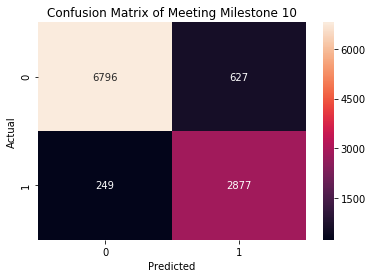

In [62]:
# The best Random Forest model
model = RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=1, n_estimators=300, random_state = 1000)

model.fit(x_train, y_train)
Forest_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(Forest_scores)
print('\nMean Cross-Validated Accuracy:' , Forest_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 2: Using difference features for meeting Milestones 1-9

In Model 2, instead of using the binary features for meeting the milestones 1 through 9, we used the numerical features showing the difference between the scheduled and actualized dates for the milestones 1 through 9. We tuned Random Forest to determine the best values for the hyperparameters of max_depth, max_features, and min_samples_leaf. Also, we determined the importance of features and selected the most important ones using the importance of features obtained from Random Forest. Finally, we selected the most important features, trained the tuned Random Forest model, and obtained the performance metrics using test dataset.

[9.06375849e-03 1.54046118e-02 5.38976514e-04 5.37090682e-02
 1.67356592e-04 1.28700343e-02 2.27116910e-02 8.33374511e-03
 2.12706499e-02 1.20147566e-03 1.32579790e-03 1.96963183e-02
 4.84334113e-03 1.97585261e-03 3.65177031e-02 5.34850383e-02
 1.18737656e-01 1.77116171e-01 1.74701634e-01 2.66329120e-01]


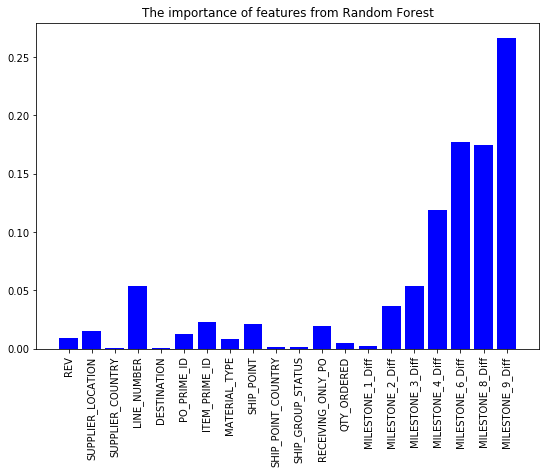

In [63]:
# Define a forest and determine the important of features
features = ['REV', 'SUPPLIER_LOCATION', 'SUPPLIER_COUNTRY', 'LINE_NUMBER', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 
            'MATERIAL_TYPE', 'SHIP_POINT', 'SHIP_POINT_COUNTRY', 'SHIP_GROUP_STATUS', 'RECEIVING_ONLY_PO', 'QTY_ORDERED', 
            'MILESTONE_1_Diff', 'MILESTONE_2_Diff', 'MILESTONE_3_Diff', 'MILESTONE_4_Diff', 'MILESTONE_6_Diff',
            'MILESTONE_8_Diff', 'MILESTONE_9_Diff', 'MILESTONE_10_meet']

df1 = df[features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

features.remove('MILESTONE_10_meet')
forest = RandomForestClassifier(n_estimators=300, random_state=1000)
forest.fit(x,y)
importances = forest.feature_importances_
print(importances)

labels = []
for f in range(x.shape[1]):
    labels.append(features[f])      
    
# Plot the importance of features in the forest
plt.figure(figsize=(9,6))
plt.title("The importance of features from Random Forest")
plt.bar(features, importances, color="b")
plt.xticks(features, labels, rotation='vertical')
plt.show()


In [64]:
selected_features = ['SUPPLIER_LOCATION', 'LINE_NUMBER', 'ITEM_PRIME_ID', 'SHIP_POINT', 'RECEIVING_ONLY_PO',
                     'MILESTONE_2_Diff', 'MILESTONE_3_Diff', 'MILESTONE_4_Diff', 'MILESTONE_6_Diff', 
                     'MILESTONE_8_Diff', 'MILESTONE_9_Diff', 'MILESTONE_10_meet']

df1 = df[selected_features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

# define training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1000)
print('The training size:', x_train.shape[0])
print('The testing size:', x_test.shape[0])

The training size: 42193
The testing size: 10549


In [65]:
# Random Forest Hyperparameters Tuning

model = RandomForestClassifier(random_state = 1000)

param_grid = [{'max_depth': [10, 15, 20],
               'max_features': [5, 7, 9],
               'min_samples_leaf': [1, 2, 3]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Random Forest Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Random Forest Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 1}

All the hyperparameters for the best Random Forest Model are:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

The Cross Validated Accuracy for the best Random Forest Model is:
0.9874860758893655


Cross-Validated Accuracies:
[0.98530806 0.98530806 0.98744076 0.98767773 0.98720379 0.98957099
 0.98625267 0.98743778 0.9874348  0.98767188]

Mean Cross-Validated Accuracy: 0.987130651061792

Training Accuracy: 0.9942881520631385

Testing Accuracy: 0.9879609441653238

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7423
         1.0       0.98      0.98      0.98      3126

   micro avg       0.99      0.99      0.99     10549
   macro avg       0.98      0.99      0.99     10549
weighted avg       0.99      0.99      0.99     10549



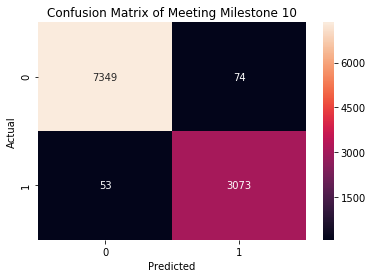

In [66]:
# The best Random Forest model
model = RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=1, n_estimators=300, random_state = 1000)

model.fit(x_train, y_train)
Forest_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(Forest_scores)
print('\nMean Cross-Validated Accuracy:' , Forest_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 3: Dropping Milestones 6 and 8 & Compare the Performance of Various Classification Methods including Random Forest, Decision Tree, SVM, KNN, and Logistic Regression

In Model 3, to increase the size of training and test datasets, we removed the features related to the Milestones 6 and 8 as they have much more Null values compared to other features. Because we want to run different classification methods and compare their performance metrics, we performed a correlation matrix beteen features and selected the highest correlated features with the target feature as the most important features. Then, we tuned the hyperparameters of several classification methods including Random Forest, Decision Tree, SVM, KNN, and Logistic Regression. Finally, we trained the tuned models, obtained the performance metrics using test dataset, and compare the results.

#### 1- Random Forest

In [67]:
df1 = df.drop(['MILESTONE_6_SCHEDULE', 'MILESTONE_6_ACTUALIZED', 'MILESTONE_6_Diff', 'MILESTONE_6_meet', 'SCHEDULE_6_10_Diff', 
               'MILESTONE_8_SCHEDULE', 'MILESTONE_8_ACTUALIZED', 'MILESTONE_8_Diff', 'MILESTONE_8_meet', 'SCHEDULE_8_10_Diff',
               'INMY_STATUS_DATE', 'OUTMY_STATUS_DATE'], 
                axis= 1)

df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65613 entries, 0 to 93351
Data columns (total 48 columns):
REV                        65613 non-null int32
SUPPLIER_LOCATION          65613 non-null int32
SUPPLIER_COUNTRY           65613 non-null int32
LINE_NUMBER                65613 non-null float64
DESTINATION                65613 non-null int32
ITEM_PRIME_ID              65613 non-null int32
PO_PRIME_ID                65613 non-null int32
MATERIAL_TYPE              65613 non-null int32
LINE_SOP_DATE              65613 non-null datetime64[ns]
LINE_RAS_DATE              65613 non-null datetime64[ns]
SCP_DATE                   65613 non-null datetime64[ns]
MILESTONE_1_SCHEDULE       65613 non-null datetime64[ns]
MILESTONE_1_ACTUALIZED     65613 non-null datetime64[ns]
MILESTONE_2_SCHEDULE       65613 non-null datetime64[ns]
MILESTONE_2_ACTUALIZED     65613 non-null datetime64[ns]
MILESTONE_3_SCHEDULE       65613 non-null datetime64[ns]
MILESTONE_3_ACTUALIZED     65613 non-null datetim

[0.01038132 0.02144689 0.00243763 0.0540858  0.00049507 0.01655006
 0.03520553 0.00731074 0.02582674 0.00258362 0.00565782 0.02428321
 0.00606075 0.00152058 0.05659923 0.09685119 0.20850105 0.42420277]


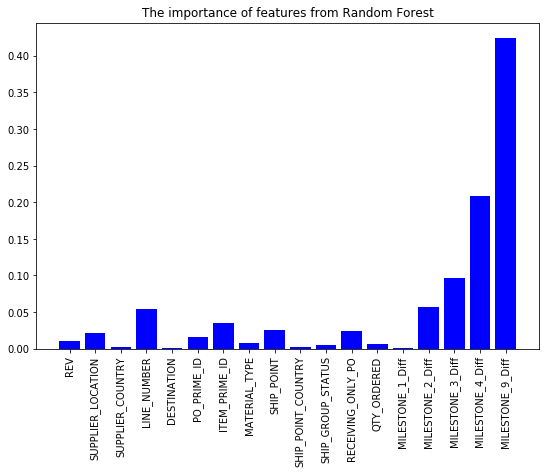

In [68]:
# Define a forest and determine the importance of features

features = ['REV', 'SUPPLIER_LOCATION', 'SUPPLIER_COUNTRY', 'LINE_NUMBER', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 
            'MATERIAL_TYPE', 'SHIP_POINT', 'SHIP_POINT_COUNTRY', 'SHIP_GROUP_STATUS', 'RECEIVING_ONLY_PO', 'QTY_ORDERED', 
            'MILESTONE_1_Diff', 'MILESTONE_2_Diff', 'MILESTONE_3_Diff', 'MILESTONE_4_Diff', 'MILESTONE_9_Diff', 
            'MILESTONE_10_meet']

df1 = df[features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

features.remove('MILESTONE_10_meet')
forest = RandomForestClassifier(n_estimators=300, random_state = 1000)
forest.fit(x,y)
importances = forest.feature_importances_
print(importances)

labels = []
for f in range(x.shape[1]):
    labels.append(features[f])      
    
# Plot the importance of features in the forest
plt.figure(figsize=(9,6))
plt.title("The importance of features from Random Forest")
plt.bar(features, importances, color="b")
plt.xticks(features, labels, rotation='vertical')
plt.show()


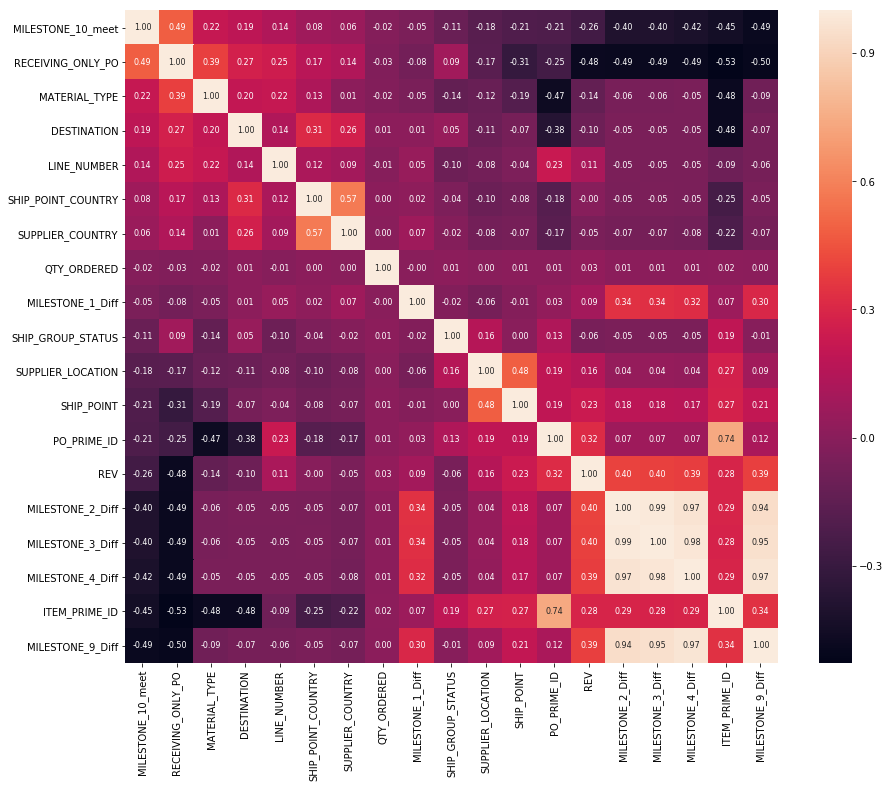

In [69]:
#  correlation matrix
correlation = df1.corr()
features = correlation.nlargest(19, 'MILESTONE_10_meet')['MILESTONE_10_meet'].index
corr_matrix = np.corrcoef(df1[features].values.T)
f, ax = plt.subplots(figsize=(15, 12))
hm = sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=features.values, xticklabels=features.values)
plt.show()

In [70]:
selected_features = ['SUPPLIER_LOCATION', 'LINE_NUMBER', 'ITEM_PRIME_ID', 'SHIP_POINT', 'RECEIVING_ONLY_PO', 
                     'MILESTONE_2_Diff', 'MILESTONE_3_Diff', 'MILESTONE_4_Diff', 'MILESTONE_9_Diff', 'MILESTONE_10_meet']

df1 = df[selected_features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

# define training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1000)
print('The training size:', x_train.shape[0])
print('The testing size:', x_test.shape[0])

The training size: 52490
The testing size: 13123


In [71]:
# Random Forest Hyperparameters Tuning

model = RandomForestClassifier(random_state = 1000)

param_grid = [{'max_depth': [10, 13, 15],
               'max_features': [5, 7, 9],
               'min_samples_leaf': [1, 2, 3]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 1}

All the hyperparameters for the best Model are:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

The Cross Validated Accuracy for the best Model is:
0.9887407125166698


Cross-Validated Accuracies:
[0.98914286 0.99104591 0.98856925 0.9878072  0.98799771 0.99142694
 0.98875976 0.99028386 0.98761669 0.98647104]

Mean Cross-Validated Accuracy: 0.9889121228458648

Training Accuracy: 0.9944941893694037

Testing Accuracy: 0.9900937285681628

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9565
         1.0       0.98      0.98      0.98      3558

   micro avg       0.99      0.99      0.99     13123
   macro avg       0.99      0.99      0.99     13123
weighted avg       0.99      0.99      0.99     13123



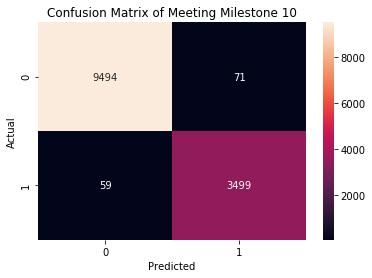

In [72]:
# The best Random Forest model
model = RandomForestClassifier(max_depth=15, max_features=5, min_samples_leaf=1, n_estimators=300, random_state = 1000)

model.fit(x_train, y_train)
Forest_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(Forest_scores)
print('\nMean Cross-Validated Accuracy:' , Forest_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 2- Decision Tree

In [73]:
# Decision Tree Hyperparameters Tuning

model = DecisionTreeClassifier(random_state = 1000)

param_grid = [{'max_depth': [10, 15, 20],
               'max_features': [5, 7, 9],
               'min_samples_leaf': [1, 2, 3, 5],
               'min_samples_split': [2, 3, 5]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'max_depth': 15, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}

All the hyperparameters for the best Model are:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1000, splitter='best')

The Cross Validated Accuracy for the best Model is:
0.9874261764145551


Cross-Validated Accuracies:
[0.98742857 0.98818823 0.98818823 0.98666413 0.98799771 0.98990284
 0.9878072  0.98666413 0.9862831  0.9847561 ]

Mean Cross-Validated Accuracy: 0.9873880230048796

Training Accuracy: 0.9939226519337017

Testing Accuracy: 0.9887982930732302

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9565
         1.0       0.98      0.98      0.98      3558

   micro avg       0.99      0.99      0.99     13123
   macro avg       0.98      0.99      0.99     13123
weighted avg       0.99      0.99      0.99     13123



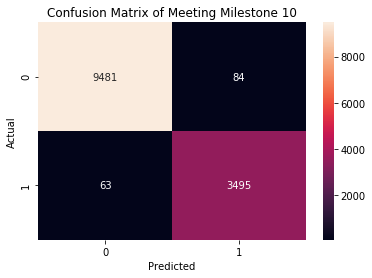

In [74]:
# The best Decision Tree model
model = DecisionTreeClassifier(max_depth = 15, max_features = 9, min_samples_leaf = 1, 
                                min_samples_split = 3,  random_state = 1000)

model.fit(x_train, y_train)
DT_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(DT_scores)
print('\nMean Cross-Validated Accuracy:' , DT_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 3- SVM

In [75]:
# SVM Hyperparameters Tuning

model = SVC(random_state = 1000)

param_grid = [{'C': [1, 5, 10, 20, 30, 50],
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'C': 50, 'kernel': 'rbf'}

All the hyperparameters for the best Model are:
SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1000,
  shrinking=True, tol=0.001, verbose=False)

The Cross Validated Accuracy for the best Model is:
0.9225185749666603


Cross-Validated Accuracies:
[0.92057143 0.9236045  0.91827015 0.91655553 0.92169937 0.9220804
 0.92455706 0.92455706 0.92150886 0.92378049]

Mean Cross-Validated Accuracy: 0.9217184836932603

Training Accuracy: 0.9232044198895027

Testing Accuracy: 0.9225786786557951

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95      9565
         1.0       0.81      0.93      0.87      3558

   micro avg       0.92      0.92      0.92     13123
   macro avg       0.89      0.93      0.91     13123
weighted avg       0.93      0.92      0.92     13123



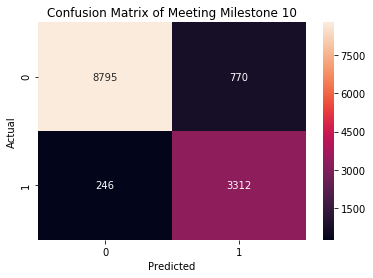

In [76]:
# The best SVM model
model = SVC(C=20, kernel='rbf', random_state=1000)

model.fit(x_train, y_train)
SVM_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(SVM_scores)
print('\nMean Cross-Validated Accuracy:' , SVM_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 4- KNN

In [77]:
# KNN Hyperparameters Tuning

model = KNeighborsClassifier()

param_grid = [{'n_neighbors': [1, 3, 5, 10, 20]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'n_neighbors': 1}

All the hyperparameters for the best Model are:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

The Cross Validated Accuracy for the best Model is:
0.9784911411697467


Cross-Validated Accuracies:
[0.97885714 0.97904363 0.9756144  0.9801867  0.97790055 0.98247285
 0.9786626  0.9801867  0.9786626  0.97675305]

Mean Cross-Validated Accuracy: 0.97883402354555

Training Accuracy: 0.9964945703943608

Testing Accuracy: 0.9809494780156977

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9565
         1.0       0.97      0.96      0.96      3558

   micro avg       0.98      0.98      0.98     13123
   macro avg       0.98      0.98      0.98     13123
weighted avg       0.98      0.98      0.98     13123



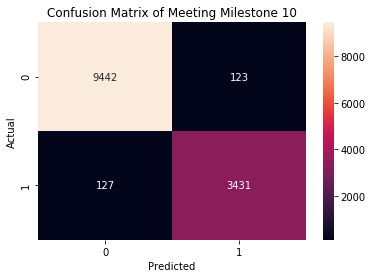

In [78]:
# The best KNN model
model = KNeighborsClassifier(n_neighbors=1)

model.fit(x_train, y_train)
KNN_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(KNN_scores)
print('\nMean Cross-Validated Accuracy:' , KNN_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 5- Logistic Regression

In [79]:
# Logistic Regression Hyperparameters Tuning

model = LogisticRegression(random_state = 1000)

param_grid = [{'penalty': ['l1', 'l2'],
               'C': [1, 5, 10, 15, 20]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'C': 10, 'penalty': 'l1'}

All the hyperparameters for the best Model are:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1000, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

The Cross Validated Accuracy for the best Model is:
0.9078491141169747


Cross-Validated Accuracies:
[0.90514286 0.90741094 0.90512479 0.90893504 0.91045914 0.91064965
 0.90950657 0.90893504 0.90360069 0.91196646]

Mean Cross-Validated Accuracy: 0.9081731153287536

Training Accuracy: 0.9083825490569633

Testing Accuracy: 0.9075668673321649

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      9565
         1.0       0.81      0.87      0.84      3558

   micro avg       0.91      0.91      0.91     13123
   macro avg       0.88      0.90      0.89     13123
weighted avg       0.91      0.91      0.91     13123



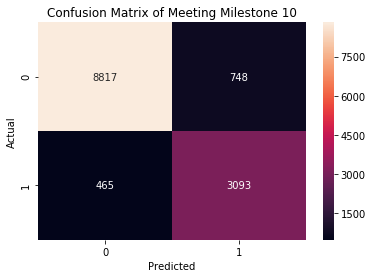

In [80]:
# The best Logistic Regression model
model = LogisticRegression(C=10, penalty='l1', random_state = 1000)

model.fit(x_train, y_train)
LR_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(LR_scores)
print('\nMean Cross-Validated Accuracy:' , LR_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

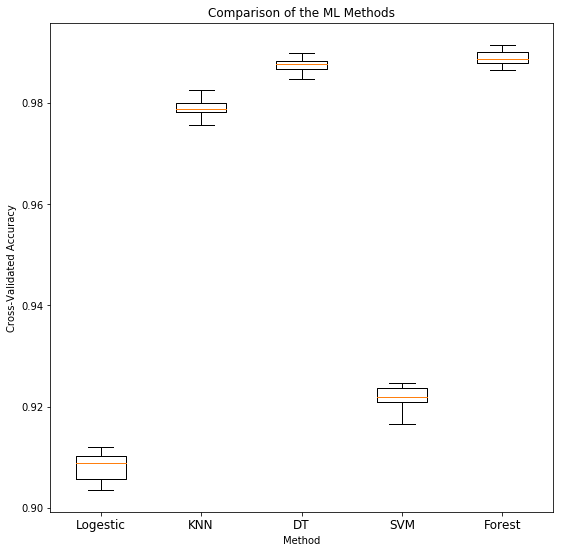

In [81]:
# Comparison of Models 
Labels = ['Logestic', 'KNN' , 'DT', 'SVM', 'Forest']
models_socres = [LR_scores, KNN_scores, DT_scores, SVM_scores, Forest_scores]
fig, ax1 = plt.subplots(figsize=(9, 9))
ax1.boxplot(models_socres)
ax1.set_xticklabels(Labels, fontsize=12)
ax1.set_title('Comparison of the ML Methods')
ax1.set_xlabel('Method')
ax1.set_ylabel('Cross-Validated Accuracy')
plt.show()

## Scenario 2: We are at the eraly stage before meeting any Milestones

In Scenario 2, we supposed that we are at the early stage before meeting any milestones. Therefore, there is no information on meeting the Milestones 1 through 9. However, we can include some features showing the difference between the scheduled date of milestone 10 and the scheduled dates of other milestones because the scheduled date of all the Milestones are set at the early stage though we don't know whether these scheduled dates will be met or not. Additionally, we used some new features showing the difference between the scheduled date of milestone 10 and some given dates such as Line_SOP date, Line_RAS date, and SCP date.
Because the comparison of the several classification methods in the previous section showed that the Random Forest Model results in better performance, we only run a Random Forest model for this scenario. The importance obtained from the Random Forest shows that while the differences between the scheduled date of milestone 10 and the scheduled dates of other milestones are not important, the differences from Line_SOP date, Line_RAS date, and SCP date are very important.

[0.01957096 0.05536052 0.00478454 0.08362722 0.00303312 0.02975666
 0.07372053 0.01724624 0.05652371 0.00582494 0.00864646 0.05914983
 0.01054022 0.00896983 0.00954623 0.01007773 0.00865981 0.
 0.18761592 0.17403416 0.17331137]


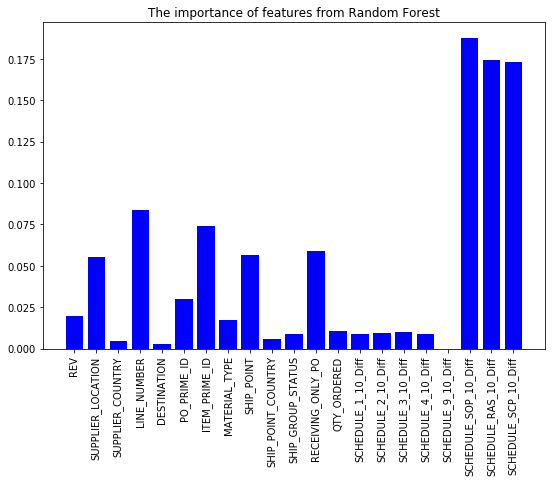

In [82]:
# Define a forest and determine the important of features

features = ['REV', 'SUPPLIER_LOCATION', 'SUPPLIER_COUNTRY', 'LINE_NUMBER', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 
            'MATERIAL_TYPE', 'SHIP_POINT', 'SHIP_POINT_COUNTRY', 'SHIP_GROUP_STATUS', 'RECEIVING_ONLY_PO',
            'QTY_ORDERED', 'SCHEDULE_1_10_Diff', 'SCHEDULE_2_10_Diff', 'SCHEDULE_3_10_Diff', 'SCHEDULE_4_10_Diff', 
            'SCHEDULE_9_10_Diff', 'SCHEDULE_SOP_10_Diff', 'SCHEDULE_RAS_10_Diff', 'SCHEDULE_SCP_10_Diff', 'MILESTONE_10_meet']

df1 = df[features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

features.remove('MILESTONE_10_meet')
forest = RandomForestClassifier(n_estimators=300, random_state = 1000)
forest.fit(x,y)
importances = forest.feature_importances_
print(importances)

labels = []
for f in range(x.shape[1]):
    labels.append(features[f])      
    
# Plot the importance of features in the forest
plt.figure(figsize=(9,6))
plt.title("The importance of features from Random Forest")
plt.bar(features, importances, color="b")
plt.xticks(features, labels, rotation='vertical')
plt.show()

In [83]:
selected_features = ['REV', 'SUPPLIER_LOCATION', 'LINE_NUMBER', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 'MATERIAL_TYPE', 'SHIP_POINT', 
                     'RECEIVING_ONLY_PO', 'SCHEDULE_SOP_10_Diff', 'SCHEDULE_RAS_10_Diff', 'SCHEDULE_SCP_10_Diff', 
                     'MILESTONE_10_meet']

df1 = df[selected_features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

# define training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1000)
print('The training size:', x_train.shape[0])
print('The testing size:', x_test.shape[0])

The training size: 61647
The testing size: 15412


In [84]:
# Random Forest Hyperparameters Tuning

model = RandomForestClassifier(random_state = 1000)

param_grid = [{'max_depth': [10, 15, 20],
               'max_features': [5, 7, 11],
               'min_samples_leaf': [1, 2, 3]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Random Forest Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Random Forest Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 1}

All the hyperparameters for the best Random Forest Model are:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

The Cross Validated Accuracy for the best Random Forest Model is:
0.9775658182879946


Cross-Validated Accuracies:
[0.98183587 0.97956536 0.97875101 0.98167072 0.98069749 0.9784231
 0.97631408 0.98312784 0.98296561 0.97809864]

Mean Cross-Validated Accuracy: 0.9801449720686802

Training Accuracy: 0.9953120184274985

Testing Accuracy: 0.979885803270179

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11427
         1.0       0.96      0.96      0.96      3985

   micro avg       0.98      0.98      0.98     15412
   macro avg       0.97      0.97      0.97     15412
weighted avg       0.98      0.98      0.98     15412



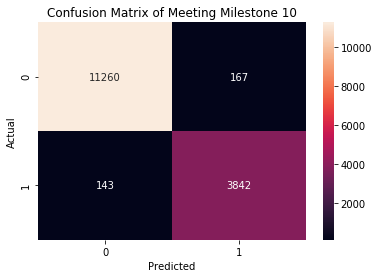

In [85]:
# The best Random Forest model
model = RandomForestClassifier(max_depth=20, max_features=7, min_samples_leaf=1, n_estimators=300, random_state = 1000)

model.fit(x_train, y_train)
Forest_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(Forest_scores)
print('\nMean Cross-Validated Accuracy:' , Forest_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Sceario 3: What if we don't have any time-dependent data?

In Scenario 3, we supposed that we do not have any information on meeting the milestones 1 through 9 as well as on other time-dependent features such as Line_SOP_date, Line_RAS_date, and SCP date. In other words, in this scenario, we supposed that there is no given date in the dataset. Therefore, we only used the time-independent features such as supplier location, line number, and shipment point to predict meeting Milestone 10. We want to know how much time-independent features are able to predict whether the Milestone 10 will be met or not. Again, we only developed a Random Forest model.

[0.04869977 0.08715072 0.01179665 0.31428634 0.04007224 0.05066621
 0.10173403 0.03436892 0.1212713  0.01568277 0.01242511 0.0909832
 0.07086273]


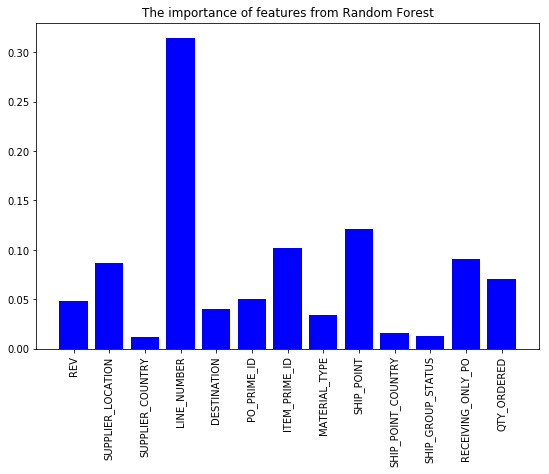

In [86]:
# Define a forest and determine the important of features

features = ['REV', 'SUPPLIER_LOCATION', 'SUPPLIER_COUNTRY', 'LINE_NUMBER', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 
            'MATERIAL_TYPE', 'SHIP_POINT', 'SHIP_POINT_COUNTRY', 'SHIP_GROUP_STATUS', 'RECEIVING_ONLY_PO', 'QTY_ORDERED',
            'MILESTONE_10_meet']

df1 = df[features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

features.remove('MILESTONE_10_meet')
forest = RandomForestClassifier(n_estimators=300, random_state = 1000)
forest.fit(x,y)
importances = forest.feature_importances_
print(importances)

labels = []
for f in range(x.shape[1]):
    labels.append(features[f])      
    
# Plot the importance of features in the forest
plt.figure(figsize=(9,6))
plt.title("The importance of features from Random Forest")
plt.bar(features, importances, color="b")
plt.xticks(features, labels, rotation='vertical')
plt.show()

In [87]:
selected_features = ['REV', 'SUPPLIER_LOCATION', 'LINE_NUMBER', 'DESTINATION', 'PO_PRIME_ID', 'ITEM_PRIME_ID', 
                     'MATERIAL_TYPE', 'SHIP_POINT', 'RECEIVING_ONLY_PO', 'QTY_ORDERED', 'MILESTONE_10_meet']

df1 = df[selected_features]
df1 = df1.dropna()
y = df1.MILESTONE_10_meet
x = df1.drop(['MILESTONE_10_meet'], axis= 1)

# define training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1000)
print('The training size:', x_train.shape[0])
print('The testing size:', x_test.shape[0])

The training size: 74703
The testing size: 18676


In [88]:
# Random Forest Hyperparameters Tuning

model = RandomForestClassifier(random_state = 1000)

param_grid = [{'max_depth': [10, 15, 20],
               'max_features': [5, 7, 10],
               'min_samples_leaf': [1, 2, 3]}]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(x_train, y_train)

print('The best tuned hyperparameters are:')
print(grid_search.best_params_)

print('\nAll the hyperparameters for the best Random Forest Model are:')
print(grid_search.best_estimator_)

print('\nThe Cross Validated Accuracy for the best Random Forest Model is:')
print(grid_search.best_score_)

The best tuned hyperparameters are:
{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 2}

All the hyperparameters for the best Random Forest Model are:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

The Cross Validated Accuracy for the best Random Forest Model is:
0.8642490930752447


Cross-Validated Accuracies:
[0.86721992 0.8650783  0.86173203 0.86414135 0.86572959 0.86880857
 0.86947791 0.86854083 0.86746988 0.86450663]

Mean Cross-Validated Accuracy: 0.8662704997996059

Training Accuracy: 0.8895492818226844

Testing Accuracy: 0.8652281002355965

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     13957
         1.0       0.75      0.71      0.73      4719

   micro avg       0.87      0.87      0.87     18676
   macro avg       0.82      0.81      0.82     18676
weighted avg       0.86      0.87      0.86     18676



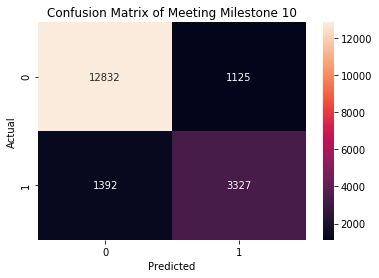

In [89]:
# The best Random Forest model
model = RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=2, n_estimators=300, random_state = 1000)

model.fit(x_train, y_train)
Forest_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validated Accuracies:')
print(Forest_scores)
print('\nMean Cross-Validated Accuracy:' , Forest_scores.mean())

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred_test)

print('\nTraining Accuracy:' , metrics.accuracy_score(y_train, y_pred_train))
print('\nTesting Accuracy:', metrics.accuracy_score(y_test, y_pred_test))

print("\nClassification Report: ")
print(metrics.classification_report(y_test, y_pred_test))

# Graph Confusion Matrix
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix of Meeting Milestone 10')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Cross-Validated Accuracies:
[0.8645022298123225, 0.8647445724784195, 0.8647255686855685, 0.8647578610958556, 0.8629950297774368, 0.8638110382496471, 0.8643730968922283, 0.8631016150911484, 0.8622805226350485, 0.8623654441030508, 0.8602806327044549, 0.8612620301024434, 0.8593717636193396, 0.8586370248090903, 0.8523822203997075, 0.849049718232801, 0.8475647845447151, 0.8381694131075562, 0.8320526812645346]

The maximum Cross-Validated is 0.8647578610958556 obtained from the test sample size = 0.2
Training accurcies are:
[0.8848044188930222, 0.8864839780583287, 0.8875044096154815, 0.8875948757078029, 0.8864837079132992, 0.8880287615696474, 0.8904705417160933, 0.8912845592303711, 0.8914482651193583, 0.8918588960997237, 0.8902189433603046, 0.894005515247249, 0.8926932256287865, 0.8967265198300789, 0.8947909527073338, 0.8977777777777778, 0.8997572468941882, 0.9014672807111492, 0.9061696658097687]

The maximum training is 0.9061696658097687 obtained from the test sample size = 0.9500000000000

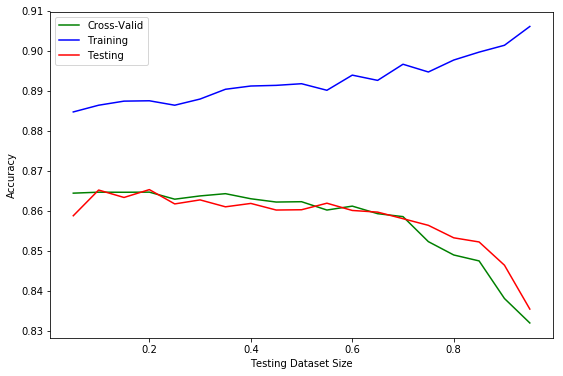

In [90]:
# Scenario 3-sensitivity analysis on the effects of training % vs. testing % on the Random Forest Model

cv_accuracies = []
train_accuracies = []
test_accuracies = []
test_percent_range = np.arange(0.05,0.96,0.05)
for test_p in test_percent_range:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_p, stratify=y, random_state=1000)
        
    model = RandomForestClassifier(max_depth=15, max_features=7, min_samples_leaf=2, random_state = 1000)
    model.fit(x_train, y_train)
    
    cv_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
    cv_accuracies.append(cv_scores.mean())
        
    y_pred_train = model.predict(x_train)
    train_accuracies.append(metrics.accuracy_score(y_train, y_pred_train))
    
    y_pred_test = model.predict(x_test)
    test_accuracies.append(metrics.accuracy_score(y_test, y_pred_test))
    
print('Cross-Validated Accuracies:')
print(cv_accuracies)
print('\nThe maximum Cross-Validated is ' + str(max(cv_accuracies)) + 
      ' obtained from the test sample size = ' + str(test_percent_range[cv_accuracies.index(max(cv_accuracies))]))
    
print('Training accurcies are:')
print(train_accuracies)
print('\nThe maximum training is ' + str(max(train_accuracies)) + 
      ' obtained from the test sample size = ' + str(test_percent_range[train_accuracies.index(max(train_accuracies))]))

print('\nTesting accurcies are:')
print(test_accuracies)
print('\nThe maximum testing accuracy is ' + str(max(test_accuracies)) + 
      ' obtained from the test sample size = ' + str(test_percent_range[test_accuracies.index(max(test_accuracies))]))

# plot the Cross-validated and Testing accuracies for different number of estimators
plt.figure(figsize=(9,6))
plt.plot(test_percent_range, cv_accuracies, label = 'Cross-Valid', color = 'g')
plt.plot(test_percent_range, train_accuracies, label = 'Training', color = 'b')
plt.plot(test_percent_range, test_accuracies, label = 'Testing', color = 'r')
plt.xlabel('Testing Dataset Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()  